# Donwload files

This jupyter notebook has the objective to retrieve the files <br>
in zip folders inside the data path for later use in the project

In [3]:
 #Import necessary modules
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import transforms
import yaml
plt.rcParams['figure.figsize'] = [20, 12]

### Set the path to here

Make sure the setup the paths properly!

In [6]:
#Path to assign tests (copy path directly)
test_path = r"C:\Users\juan.pablo\Documents\temporal_school_rel\CS231N-Final-Proj\notebooks"

print(os.path.exists(test_path))

#Set the path to this working directory
os.chdir(test_path)
print(os.getcwd())

import sys
#Append the path the src folder
sys.path.append(r'C:\Users\juan.pablo\Documents\temporal_school_rel\CS231N-Final-Proj\src')

print(sys.path)

True
c:\Users\juan.pablo\Documents\temporal_school_rel\CS231N-Final-Proj\notebooks
['C:\\Users\\juan.pablo\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'C:\\Users\\juan.pablo\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'C:\\Users\\juan.pablo\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'C:\\Users\\juan.pablo\\AppData\\Local\\Programs\\Python\\Python311', 'c:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\venv', '', 'c:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\venv\\Lib\\site-packages', 'c:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\juan.pablo\\Documents\\temporal_school_rel\\CS231N-Final-Proj\\src', 'C:\\

In [ ]:
    with open(args.config_file, 'r') as f:
       config = yaml.safe_load(f)

### Import the necessary module for downloading

Note for this: EVERYTIME There is a change inside the download <br>
the changes inside the file would only be shown if the jupyter kernel is restarted. <br>


In [3]:
# Import the necessary modules
from utils import CXReader, DfReader
from utils.models.gmvae import GMVAE
from utils import tools 

### Set the data path

In [4]:
# Create the data path
data_path = os.path.join(test_path, os.pardir, "data", "images", "images")
meta_path = os.path.join(test_path, os.pardir, "meta")

### Get the dataframes of the data
First, lets obtain the dataframes for the data and check that all metadata <br>
information has been set up properly. <br>

In [5]:
#Create a dataframe compiler
df_compiler = DfReader()

#set the path and retrieve the dataframes
df_compiler.set_folder_path(meta_path)

#Get the dataframe holder and names
dfs_holder, dfs_names = df_compiler.get_dfs()

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00,  7.15it/s]

The file: train.csv has been retrieved
The file: test.csv has been retrieved
The file: val.csv has been retrieved


In [6]:
# Get the device if cuda or not
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

# Define mean and std for normalization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define a transformation for converting and normalizing images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.CenterCrop((224, 224)),  # Center crop to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean, std)  # Apply mean and std normalization
])

#Create datasets and dataloaders
test_dataset = CXReader(data_path=data_path, dataframe=dfs_holder[0], transform=transform, device=device)

#Sampled images from train to see single shape
samp3_image, label3 = test_dataset[1]
print("Shape of a single image and its labels")
print(f"Image: {samp3_image.shape}, labels: {label3.shape}")


Shape of a single image and its labels
Image: torch.Size([3, 224, 224]), labels: torch.Size([14])


### Print an image and see the output

In [7]:
print(samp3_image)
print(samp3_image.shape)

tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.1179, -2.1008, -2.1008],
         [-2.0494, -2.0494, -2.0494,  ..., -2.0837, -2.0665, -2.0665],
         [-1.9980, -1.9980, -1.9980,  ..., -2.0323, -2.0323, -2.0323],
         ...,
         [-1.3130, -1.1760, -1.0562,  ...,  0.4679,  0.3652,  0.4508],
         [-1.3302, -1.1932, -1.0562,  ...,  0.4337,  0.3481,  0.4851],
         [-1.3473, -1.1932, -1.0562,  ...,  0.4166,  0.3481,  0.5193]],

        [[-2.0182, -2.0182, -2.0182,  ..., -2.0357, -2.0182, -2.0182],
         [-1.9657, -1.9657, -1.9657,  ..., -2.0007, -1.9832, -1.9832],
         [-1.9132, -1.9132, -1.9132,  ..., -1.9482, -1.9482, -1.9482],
         ...,
         [-1.2129, -1.0728, -0.9503,  ...,  0.6078,  0.5028,  0.5903],
         [-1.2304, -1.0903, -0.9503,  ...,  0.5728,  0.4853,  0.6254],
         [-1.2479, -1.0903, -0.9503,  ...,  0.5553,  0.4853,  0.6604]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.8044, -1.7870, -1.7870],
         [-1.7347, -1.7347, -1.7347,  ..., -1

### Create a code that plots an image

In [8]:
def show_image(image, name_img: str):
    """
    Instance method that would plot an
    image to see if the dataset is properly set.
    """
    f, ax1 = plt.subplots(1, 1)
    ax1.set_title('Desired image ' + name_img)
    ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
    plt.show()

### Create a code that scales the image between 0 to 1

This is a code that will take the image and scale it between 0  to 1 (same transformation done for mse). <br>
This is because in the MSE architecture, CXR14-V3 at one point takes the x input image and converts it to 0 - 1. <br>

In [9]:
def scale_to_01(tensor):
    """
    Function to scale score a tesnor of batch size x dim
    """
    scaled_tensor = (tensor - tensor.min().item()) / (tensor.max().item() - tensor.min().item())
    return scaled_tensor

### Sample a test image.

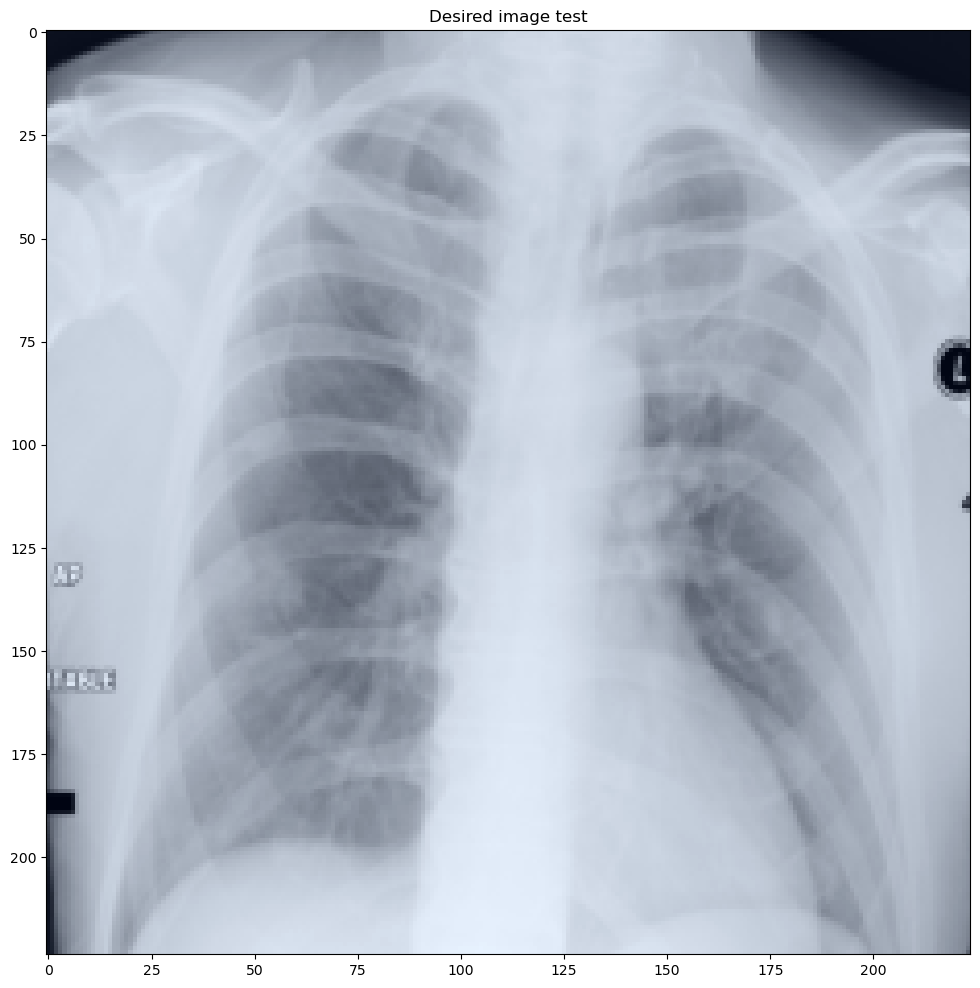

torch.Size([224, 224])
TEST LABELS
tensor([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=torch.float16)


In [10]:
#Sampled images for test
samp1_image, label1 = test_dataset[4]
show_image(scale_to_01(samp1_image), "test")
print(samp1_image[0].shape)
print("TEST LABELS")
print(label1)

## Create functions that calculate the pdf of an image.

Now, we have to calculate te pdf and plot it to see for each image.

In [11]:
def calculate_pdf(image):
    """
    Calculate the pdf of the image from a torch sensor.
    """
    # Flatten the image into a 1D array
    flattened_image = image.flatten()

    # Calculate the histogram
    hist, bins = torch.histogram(flattened_image, bins=256, density=True)

    #Normalize to scale to obtain a pdf tht sums to 1 (rule of probability)
    pdf =hist / torch.sum(hist)

    return pdf, bins

def calculate_cdf(pdf):
    """
    Calculate the cdf from a pdf
    """
    # Calculate the cumulative sum of the PDF to get the CDF
    cdf = torch.cumsum(pdf, dim=0)

    return cdf

def plot_cdf(cdf, bins):
    # Plot the CDF
    plt.plot(bins[:-1], cdf, color='r', alpha=0.7)
    plt.title('Cumulative Distribution Function (CDF) of Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    plt.show()

def plot_pdf(pdf, bins):
    # Plot the PDF
    plt.plot(bins[:-1], pdf, color='b', alpha=0.7)
    plt.title('Probability Density Function (PDF) of Grayscale Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Probability Density')
    plt.show()

### Execute the functions

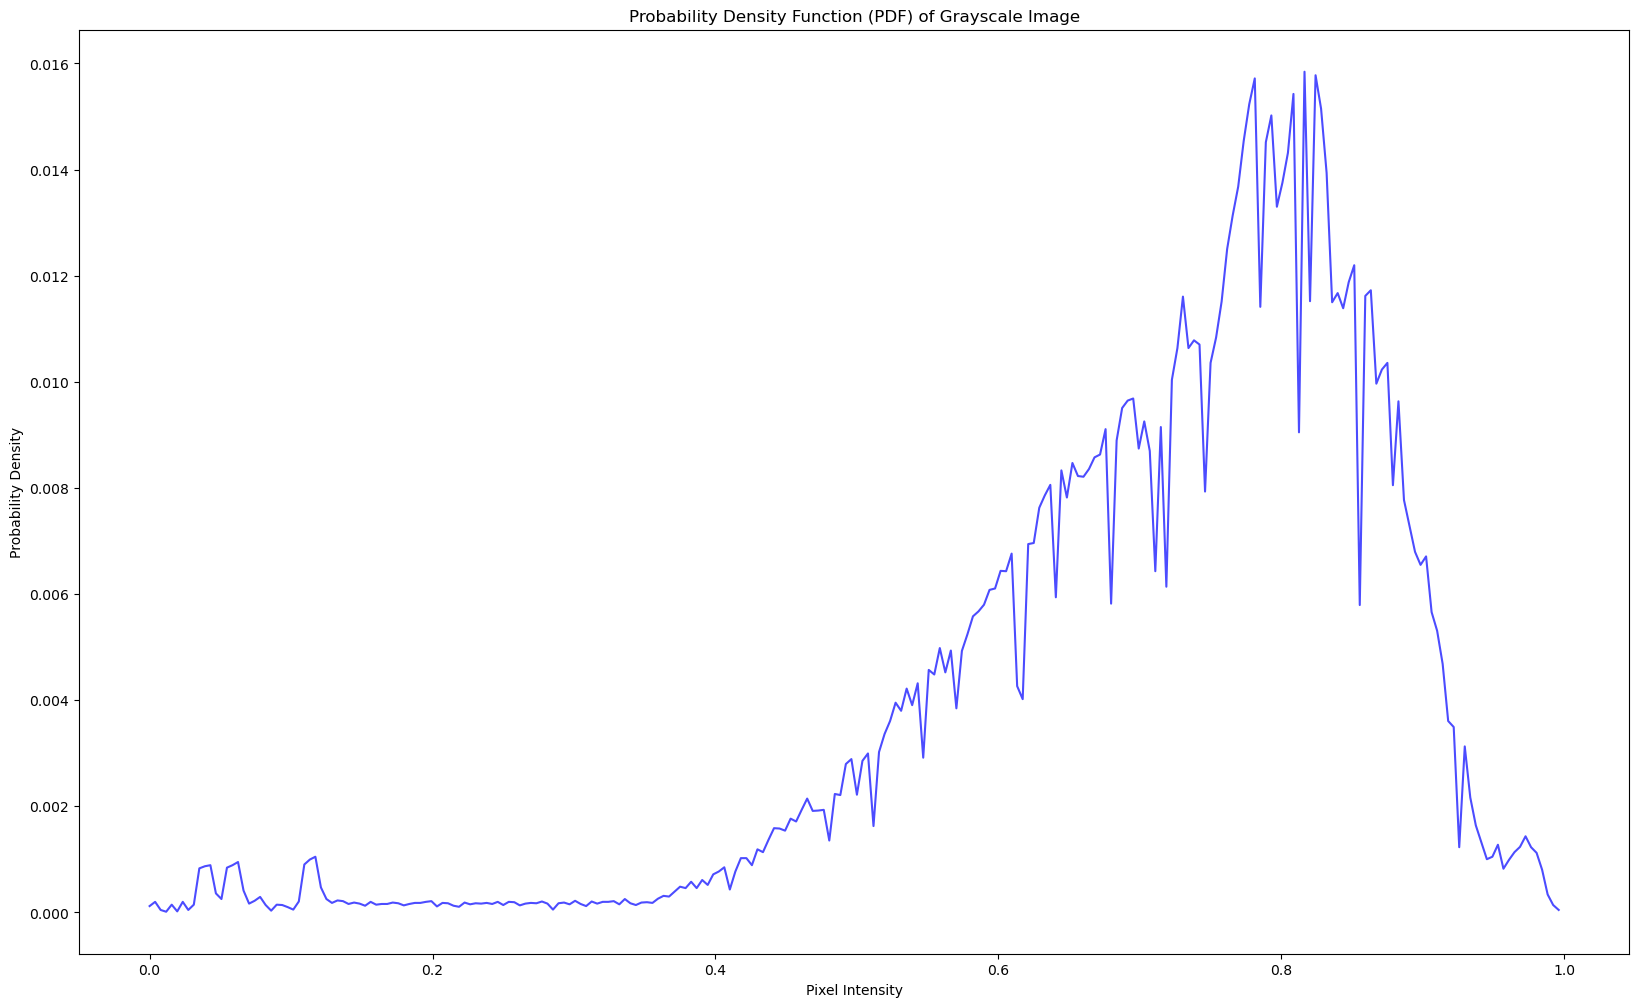

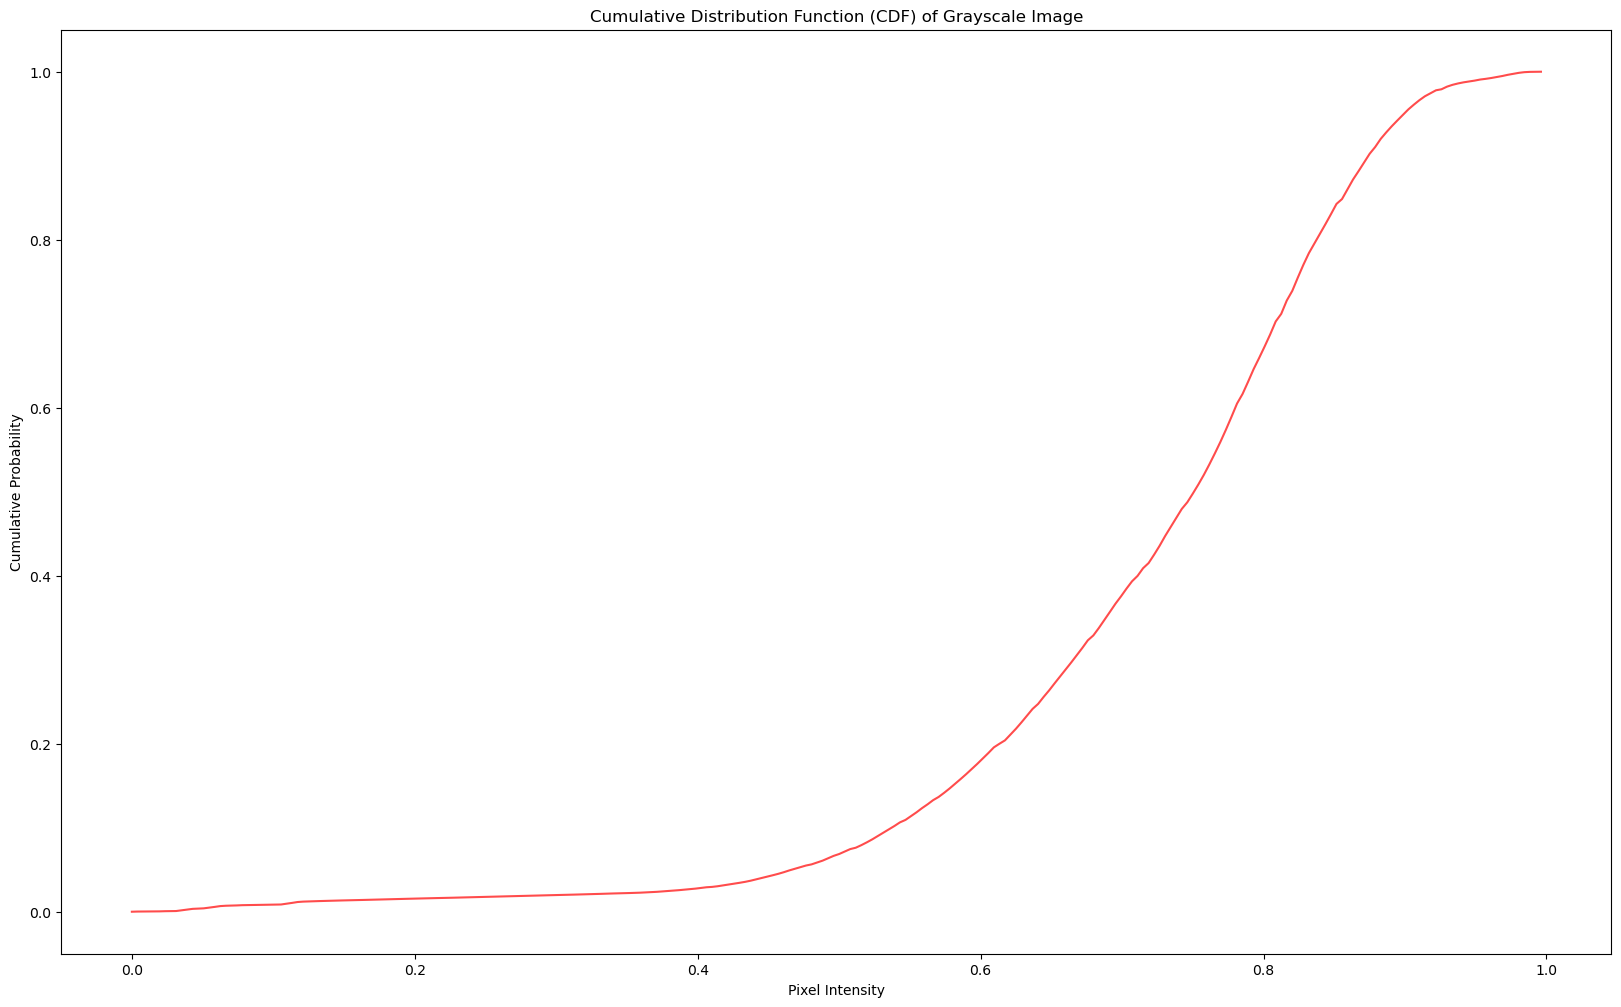

In [12]:
### Calculate the pdf for real image.
pdf_real_image, bins_real_image = calculate_pdf(scale_to_01(samp1_image))

#Plot the pdf and bins
plot_pdf(pdf_real_image, bins_real_image)

#Calculate the cdf
cdf_image = calculate_cdf(pdf_real_image)

#Plot the cdf for the image
plot_cdf(cdf_image, bins_real_image)

## Load the model MSE to asses the ks

Now, the next step is to retrieve the images from the pretrained GMVAE to perform. <br> KS test between flattened tensor of images to retrieve the KS versions. <br><br>

Before doing that, I am gonna first perform KS test with simple distrutions <br>
using kernel density estimations.

In [13]:
from utils.models.fs_gmvae import FS_GMVAE
#Z space like run gmvae

# ADDED CODE: Set z to 1280 (28*28 -> 224*224 is 64 times by size)
z = 300
k = 50
run = 0
global_num = 200
loss = "mse"
name = 'fs_gmvaetest' + loss

layout = [
    ('model={:s}', name),
    ('z={:02d}',  z),
    ('k={:03d}',  k),
    ('run={:04d}', run)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
print('Model name:', model_name)

#model type
model_type = "FSVAE_CXR14_V1_Kuni"

fs_gmvae = FS_GMVAE(nn=model_type,z_dim=z, k=k, name=model_name, loss_type=loss, y_dim=14).to(device)
#fs_gmvae.load_state_dict(torch.load(os.path.join(os.getcwd(), "model-00100.pt")))

tools.load_model_by_name(fs_gmvae, global_step=global_num)

Model name: model=fs_gmvaetestmse_z=300_k=050_run=0000
Loaded from /project/cs231/CS231N-Final-Proj/notebooks/checkpoints/model=fs_gmvaetestmse_z=300_k=050_run=0000/model-00200.pt


### Show image and plot it

torch.Size([3, 224, 224])


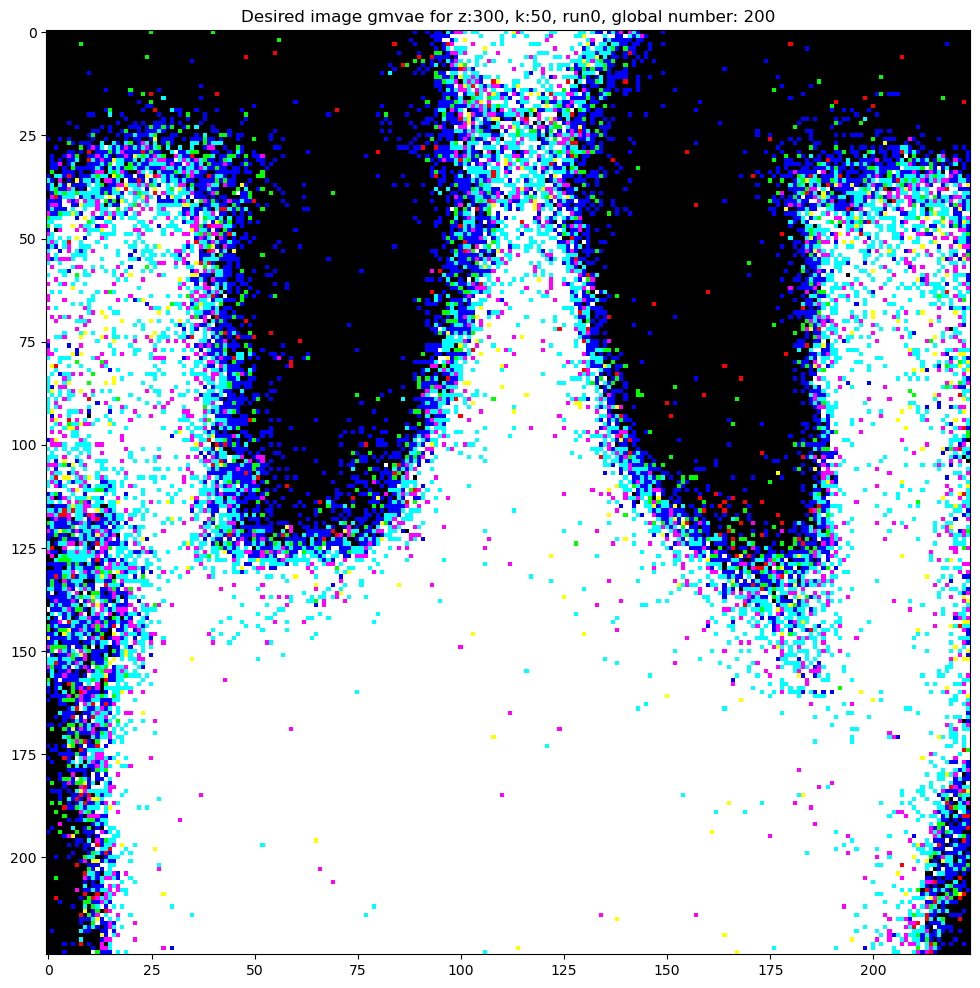

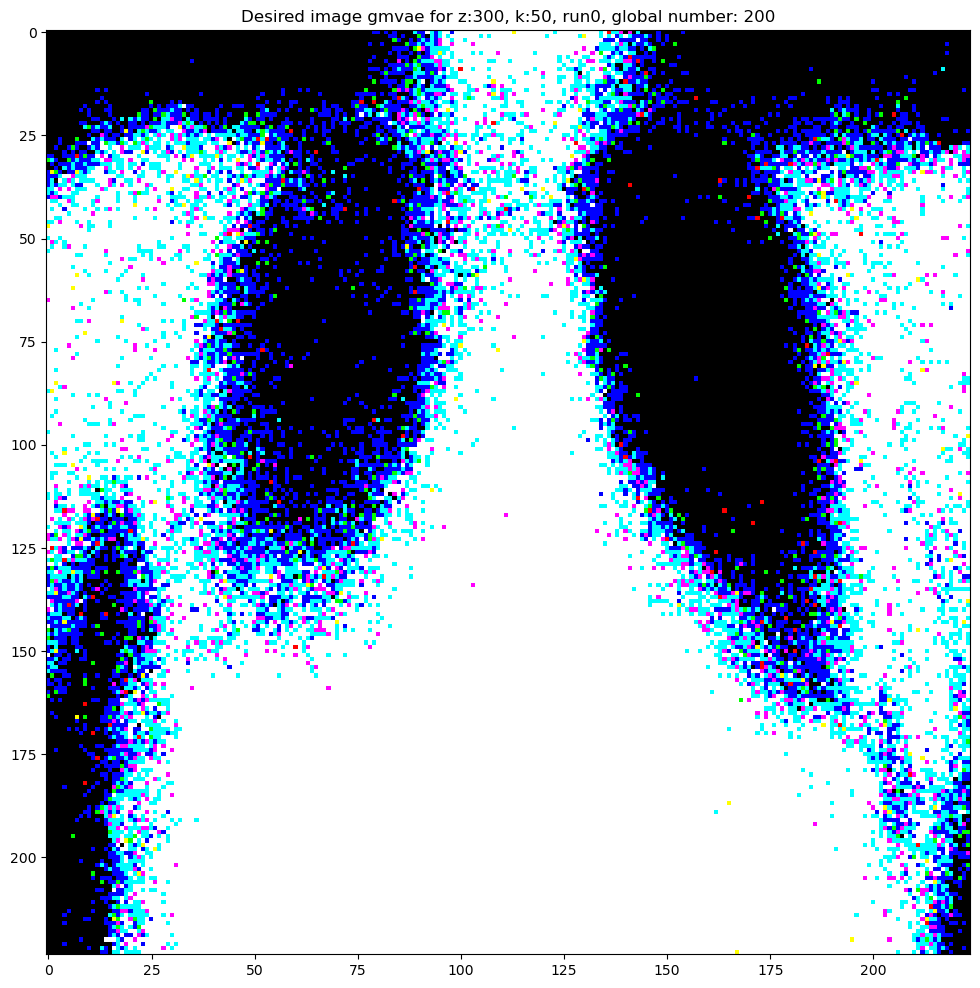

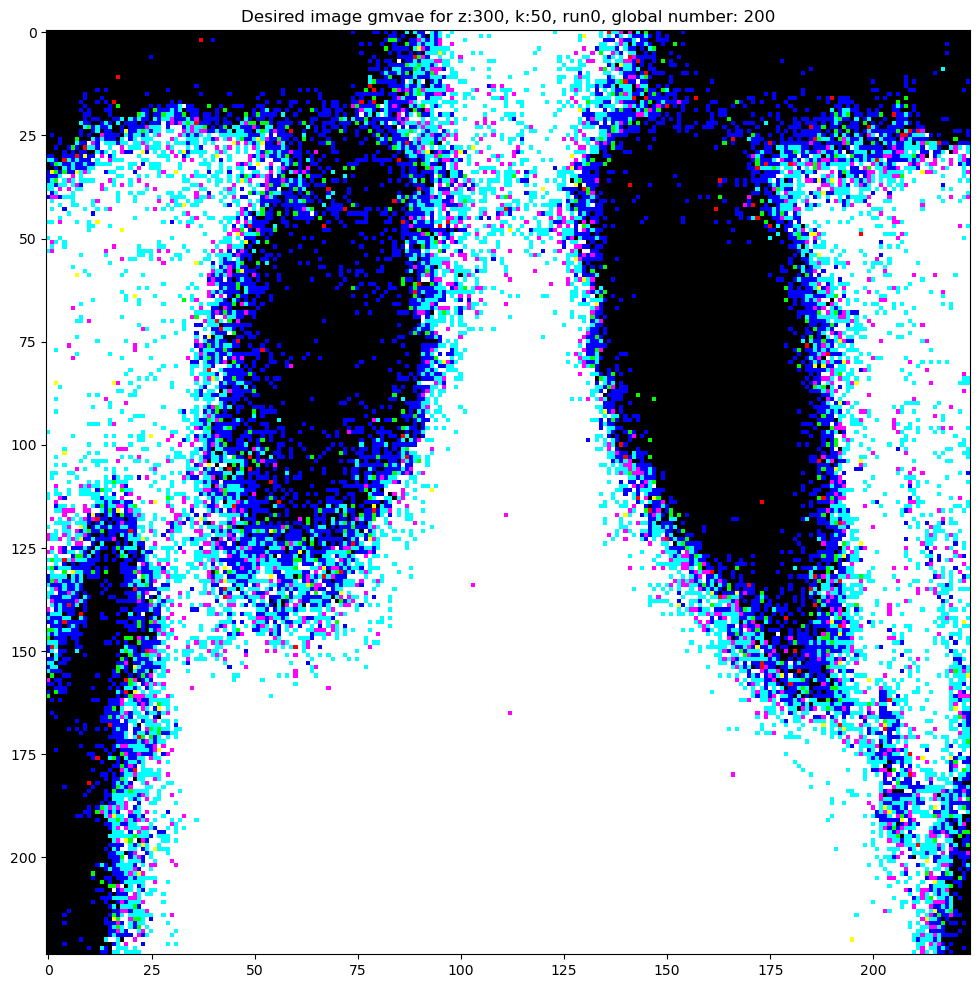

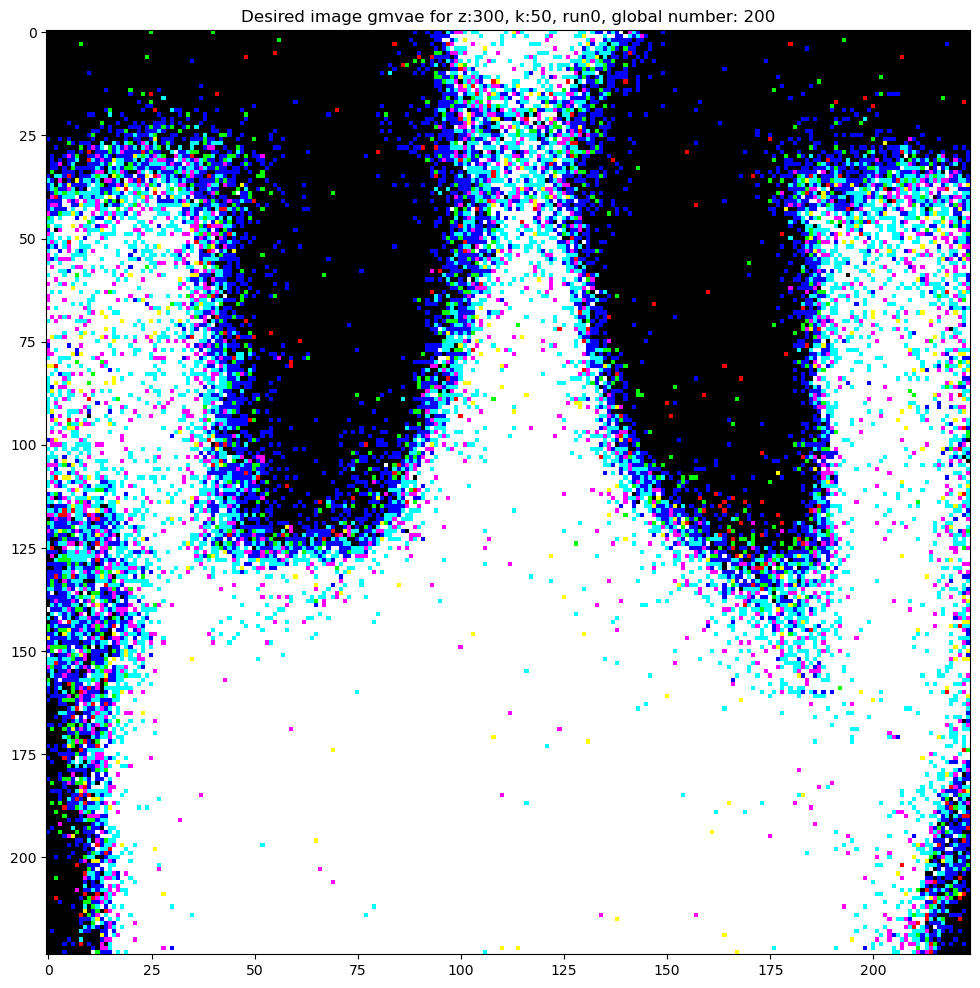

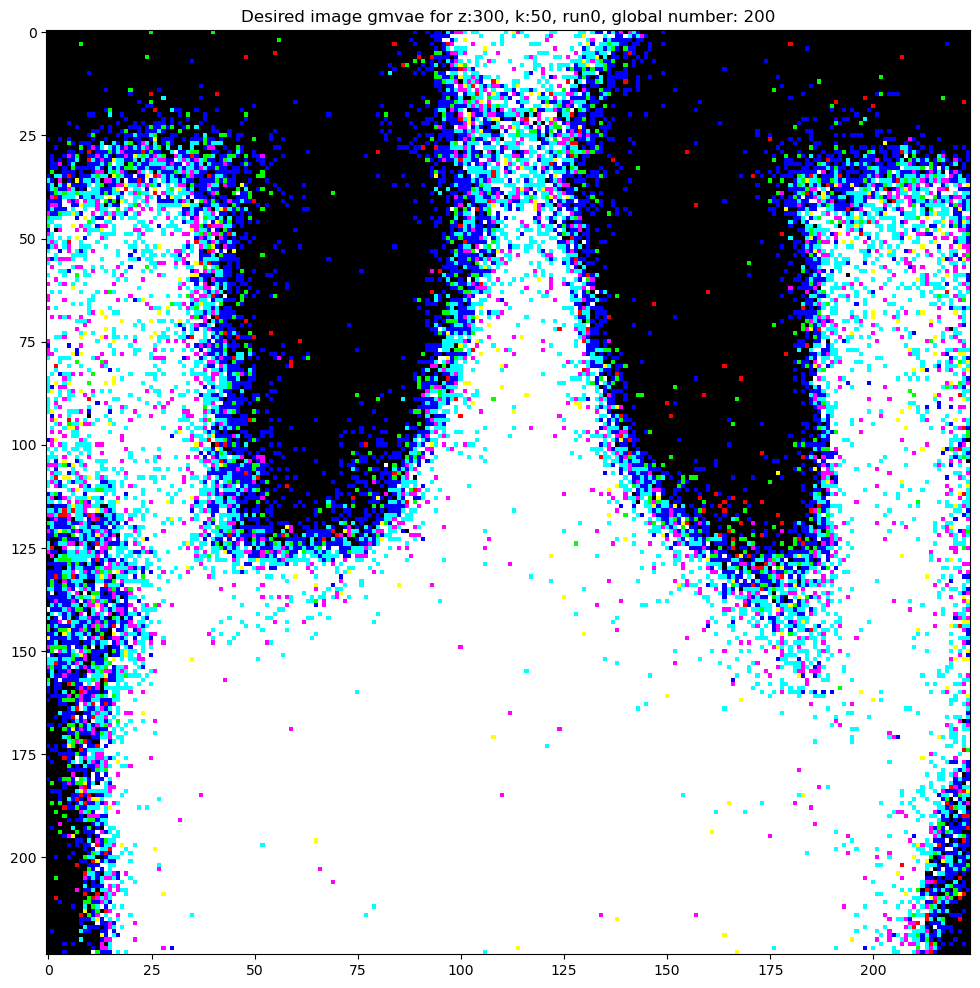

In [21]:
#Batch number
batch_num = 5

# Which medical condition (index from 0 to 19) we turn on to sample corresponding images
# (We can also select multiple of them)
# "1" indicates "CardioMegaly", which would be easier to confirm visually compared with others
med_condition = 12

# A 14-dim label used to sample images, turning on the specified medical condition(s)
# (See if the model actually generate corresponding samples!)
testing_label = torch.zeros(14, batch_num).to(device)
testing_label[med_condition] = 1 # Corresponding row is now (1,1,1...)
testing_label = torch.t(testing_label) # If med_condition=1, labels of (0,1,0...) with shape (batch_num, 20)

# Sample images given y (testing_label)
samples = fs_gmvae.sample_x(batch_num, testing_label).reshape(batch_num,3,224,224)

print(samples[2].shape)
for idx in range(batch_num):
    show_image(samples[idx].cpu().detach(), f"gmvae for z:{z}, k:{k}, run{run}, global number: {global_num}")

# KS two test sample statistic

Now that we have done all of the required functions, is time to put everything together! <br>
The following are the steps that are required to follow to obtain all of the test statistics. <br><br>
1. Load 100 images from the test validation set and load them into a list. <br>
2. Load 100 generated images from the GMVAE model (or model desired) to a list. <br>
3. Create a KS statistic function that find the suprema distance between two CDFs desired from X1 and X2 (generated vs real image) <br>
4. Create a fuction that based on the critical value selected (copied from), determine the critical value calculation; : <br>
https://doc.lagout.org/science/0_Computer%20Science/2_Algorithms/The%20Art%20of%20Computer%20Programming%20%28vol.%202_%20Seminumerical%20Algorithms%29%20%283rd%20ed.%29%20%5BKnuth%201997-11-14%5D.pdf
https://sparky.rice.edu/astr360/kstest.pdf
5. Create a function that will compare the values of ks stat, and critical value, and return 1 or 0 (1 meaning null hypothesis is rejected, meaning they come from the same distribution) <br>
otherwise, they dont come from the same distribution.

### Obtain cdfs and plot the ks statistic.

First thing is, create a function that is able to find the cdf from a gen and real image <br>
and see the plot of the suprema of distances.

In [19]:
def plot_cdfs_and_ks_statistic(cdf1, cdf2, bins, idx:int):
    # Plot the CDFs
    plt.plot(bins[:-1], cdf1, label='CDF gen image', color='r', alpha=0.7)
    plt.plot(bins[:-1], cdf2, label='CDF real image', color='b', alpha=0.7)
    
    # Highlight the point with the maximum KS statistic
    max_ks_index = torch.argmax(torch.abs(cdf1 - cdf2))
    plt.scatter(bins[max_ks_index], cdf1[max_ks_index], color='g', marker='o', label=f'Max KS Statistic')

    plt.title(f'Cumulative Distribution Functions (CDFs) with KS Statistic: iteration {str(idx)} ')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

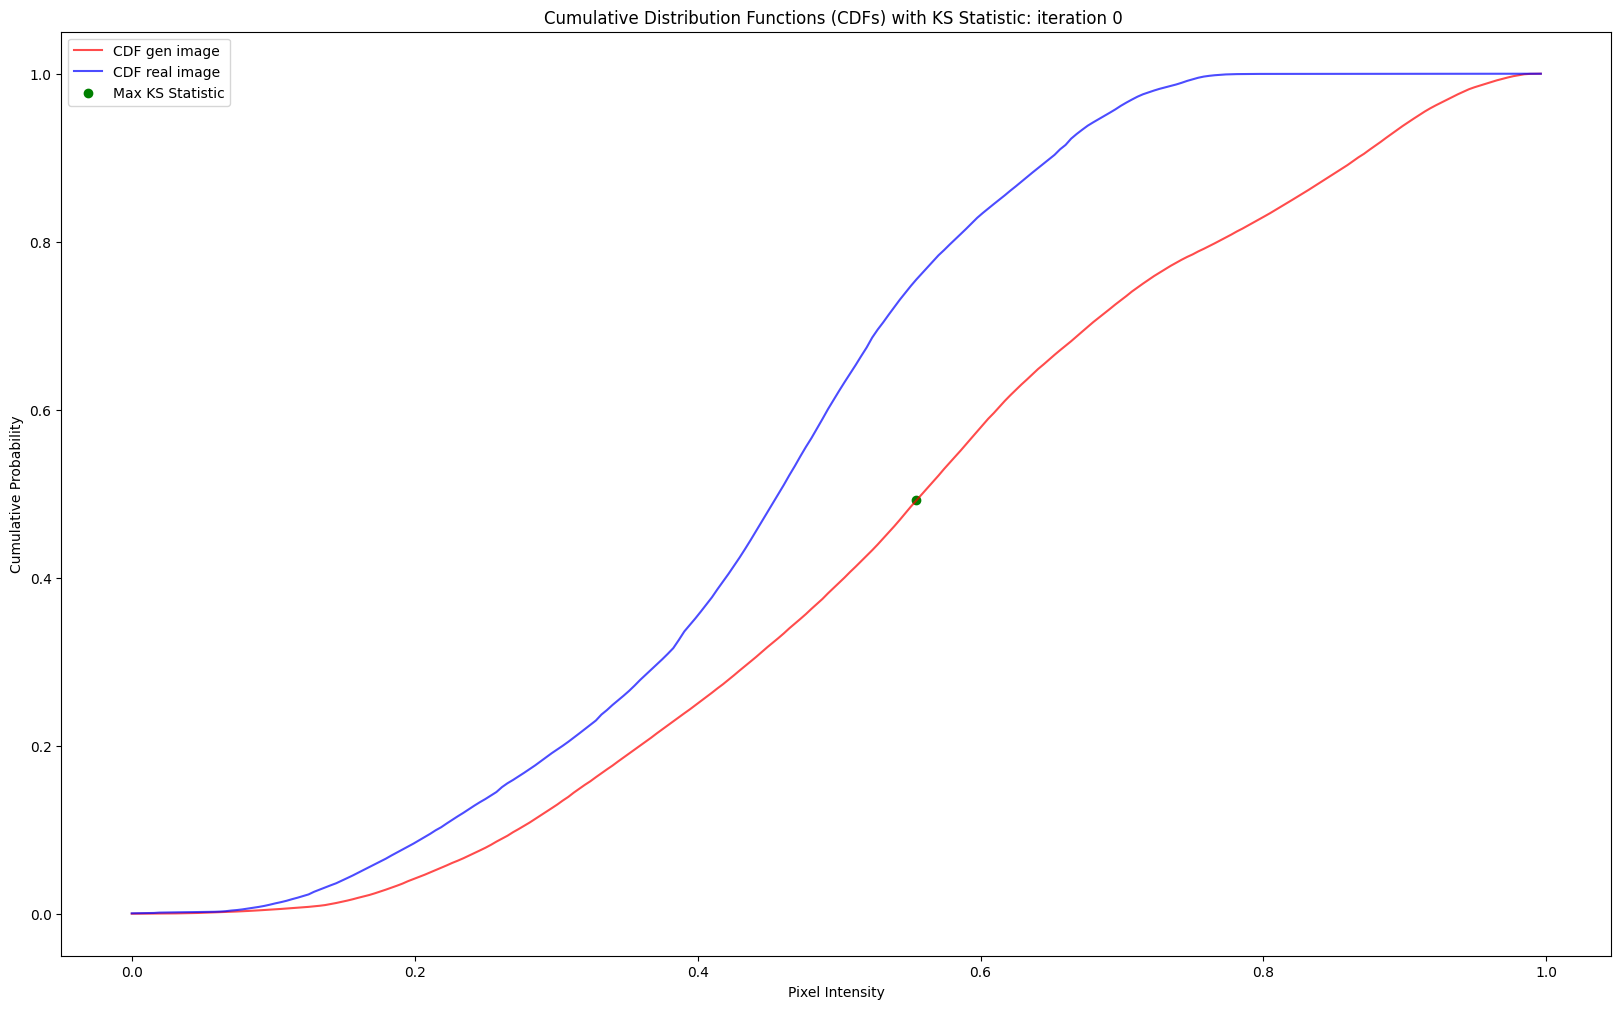

In [20]:
### Calculate the pdf and cdf for gen image.
pdf_gen_image, bins = calculate_pdf(samples[0].detach())
cdf_gen_image = calculate_cdf(pdf_gen_image)

### Calculate the pdf and gen for real image.
pdf_real_image, bins= calculate_pdf(scale_to_01(samp1_image))
cdf_real_image = calculate_cdf(pdf_real_image)

##Plot the cdfs
plot_cdfs_and_ks_statistic(cdf_gen_image, cdf_real_image, bins, idx = 0)

In [21]:
def ks_statistics(cdf_1, cdf_2):
    """
    Function that will the cdf_1 and cdf_2
    and calculate the suprema of the difference 
    between two cumulative distributive functions.
    """
    ### Create a code that determines the max difference cdf_1, cdf_2
    suprema_ks = torch.max(cdf_1- cdf_2)

    return suprema_ks

def crit_value(n_size, m_size, alpha):
    """
    Function that will determine critical value
    between 
    """
    #Calc crit value
    pre_crit_val = np.sqrt(-np.log(alpha/2)*0.5)

    #Calculate the critical value
    crit_val = pre_crit_val*np.sqrt((n_size + m_size)/(n_size*m_size))
    return crit_val

In [39]:
### Create list holders for 100 gen and real images
gen_images = []
real_images = []

#Define batch num now to 100
batch_num = 500

#Obtain 100 images sampled from the model
#samples = gmvae.sample_x(batch_num).reshape(batch_num,3,224,224).cpu()


#Iterate through the 100 images from the real test set
for i in range(batch_num):
    #Sample a real image and real label
    real_image, real_label = test_dataset[i]

    #Insert one dimension to the real label
    real_label = real_label.view(1, -1)

    #Scale the real image to 1
    real_image = scale_to_01(real_image)

    #Sample from the FS_GMVAE only 1 image
    samples = fs_gmvae.sample_x(1, real_label).reshape(1,3,224,224)

    #Obtain the gen_image
    gen_image = samples[0, :, :, :]

    #Append to gen images and real images respectively
    gen_images.append(gen_image.detach())
    real_images.append(real_image.detach())

### Iterate through all images obtained and perform KS test.
We know for sure the following: <br>
1. The hypothesis is that Distance of KS statistic should be small if coming from the same distribution, therefore is < crit value <br>
2. Otherwise, the null hypothesis is accepted and they are from two different distributions <br>

Iterate through all images and perform the following: <br>
1. Select one real image. <br>
2. Start another for loop to iterate through all gen images- <br>
3. Calculate the ks statistic. <br>
4. Calculate the crit value. <br>
5. Determine if the condition of ks stat > crit value. <br>
6. if greater, reject null hypothesis. <br>

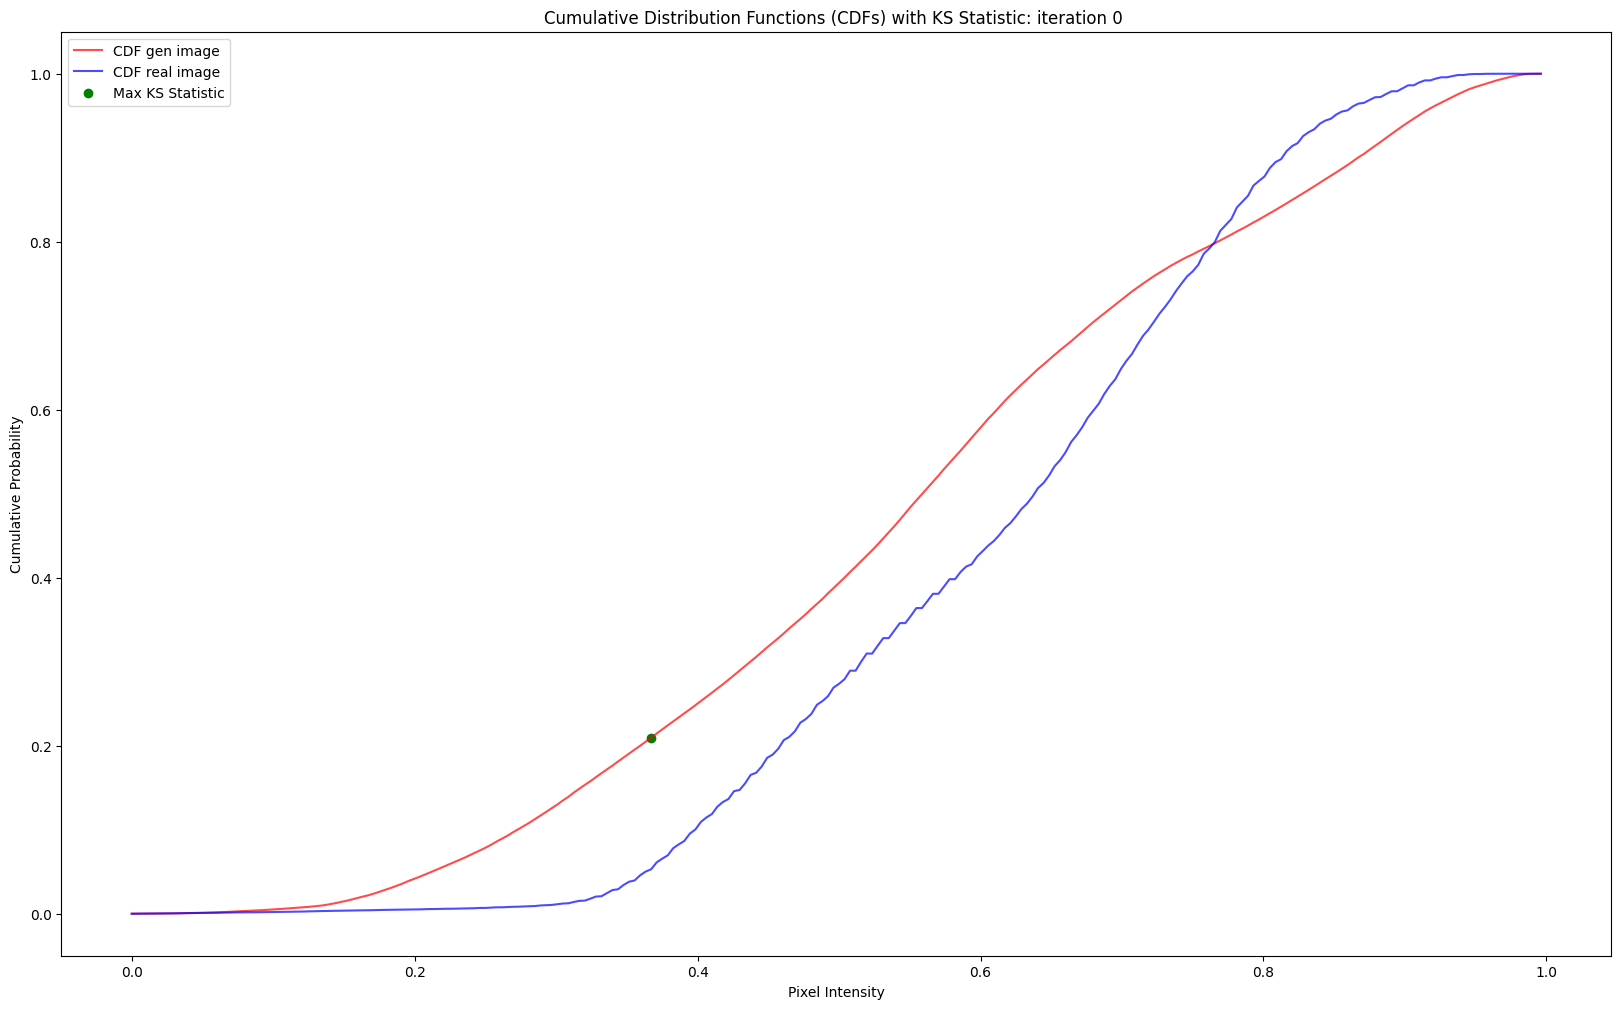

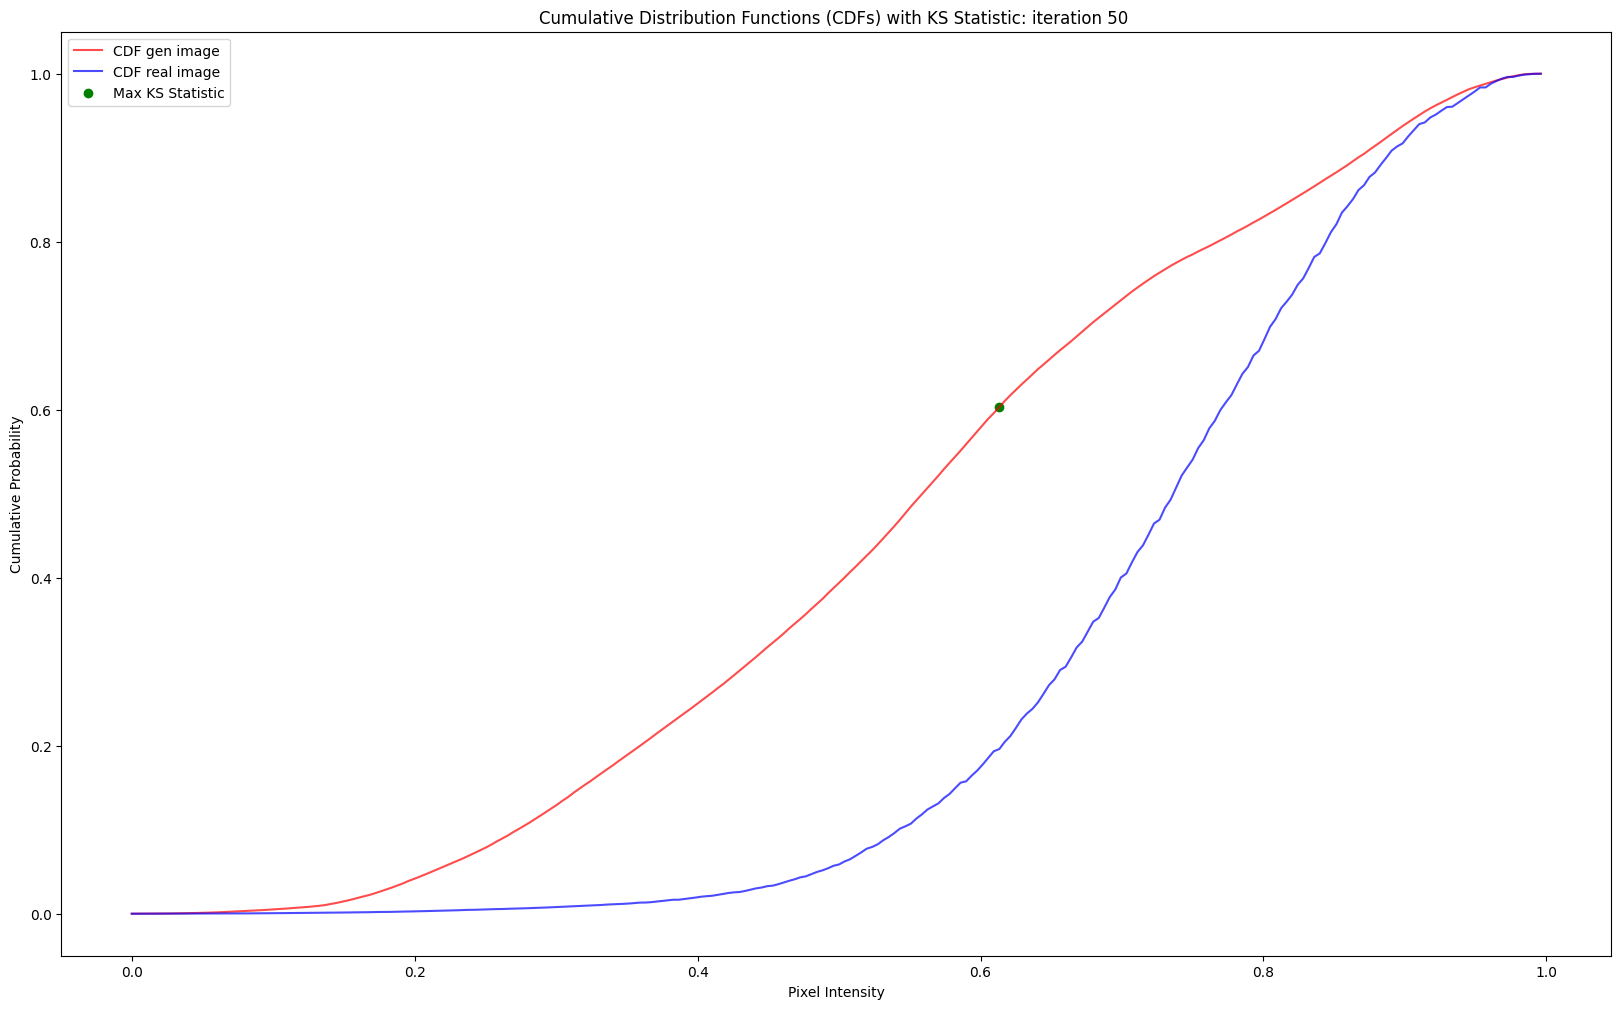

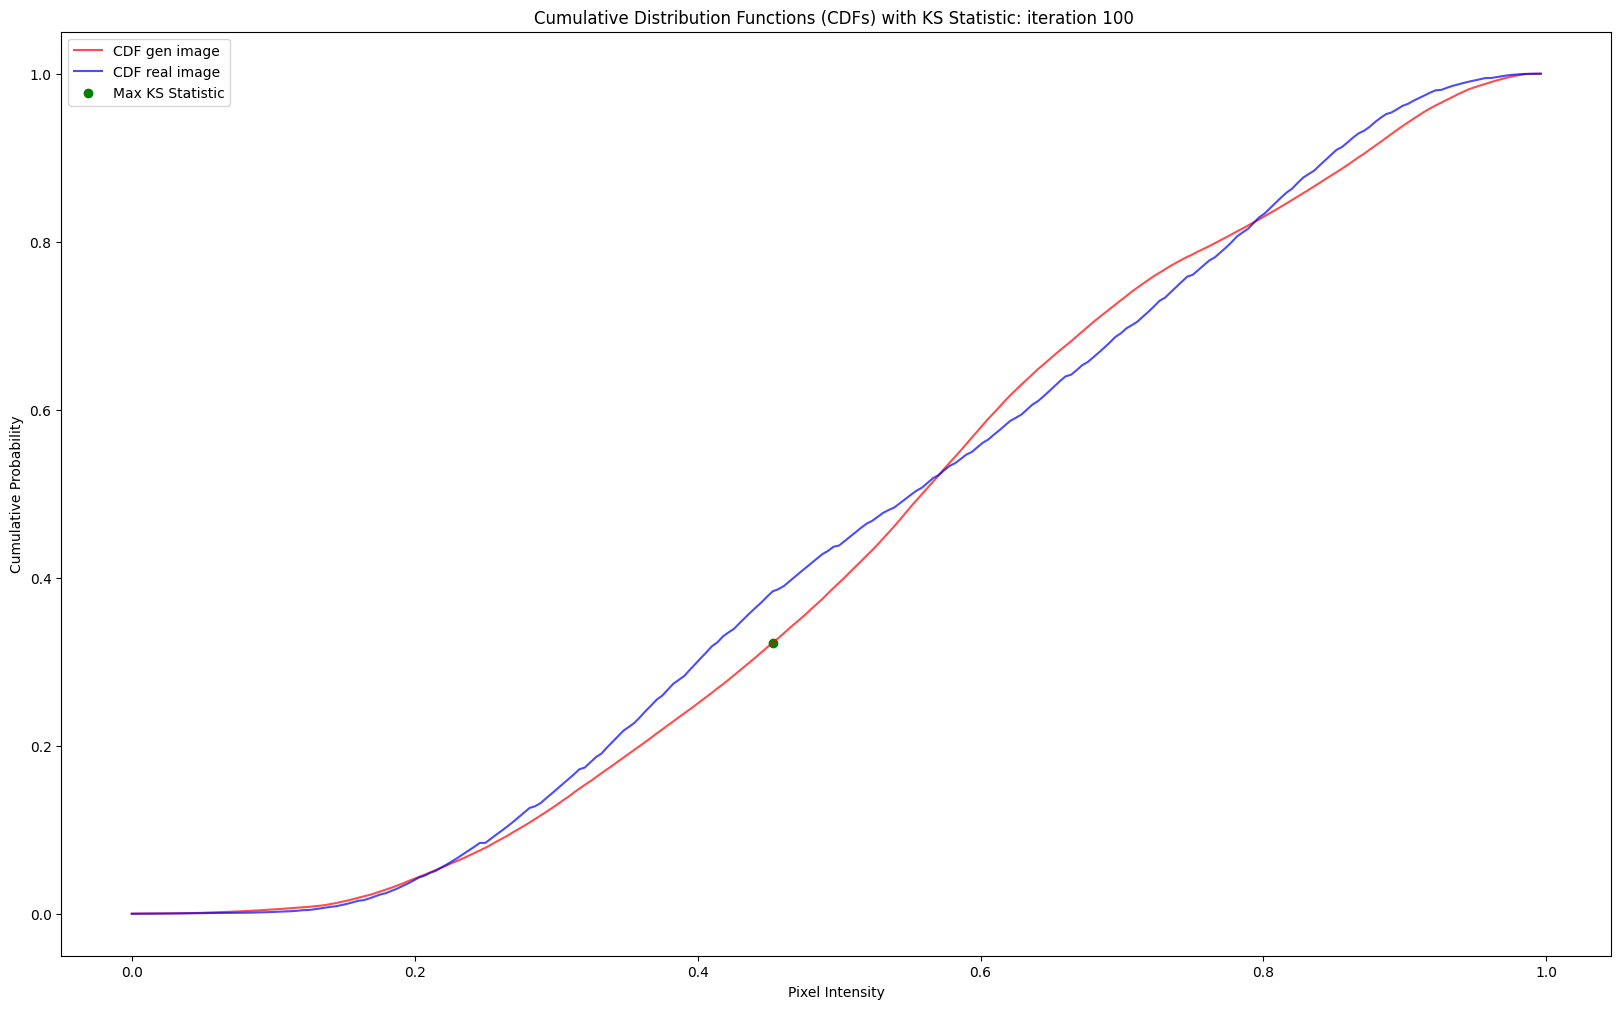

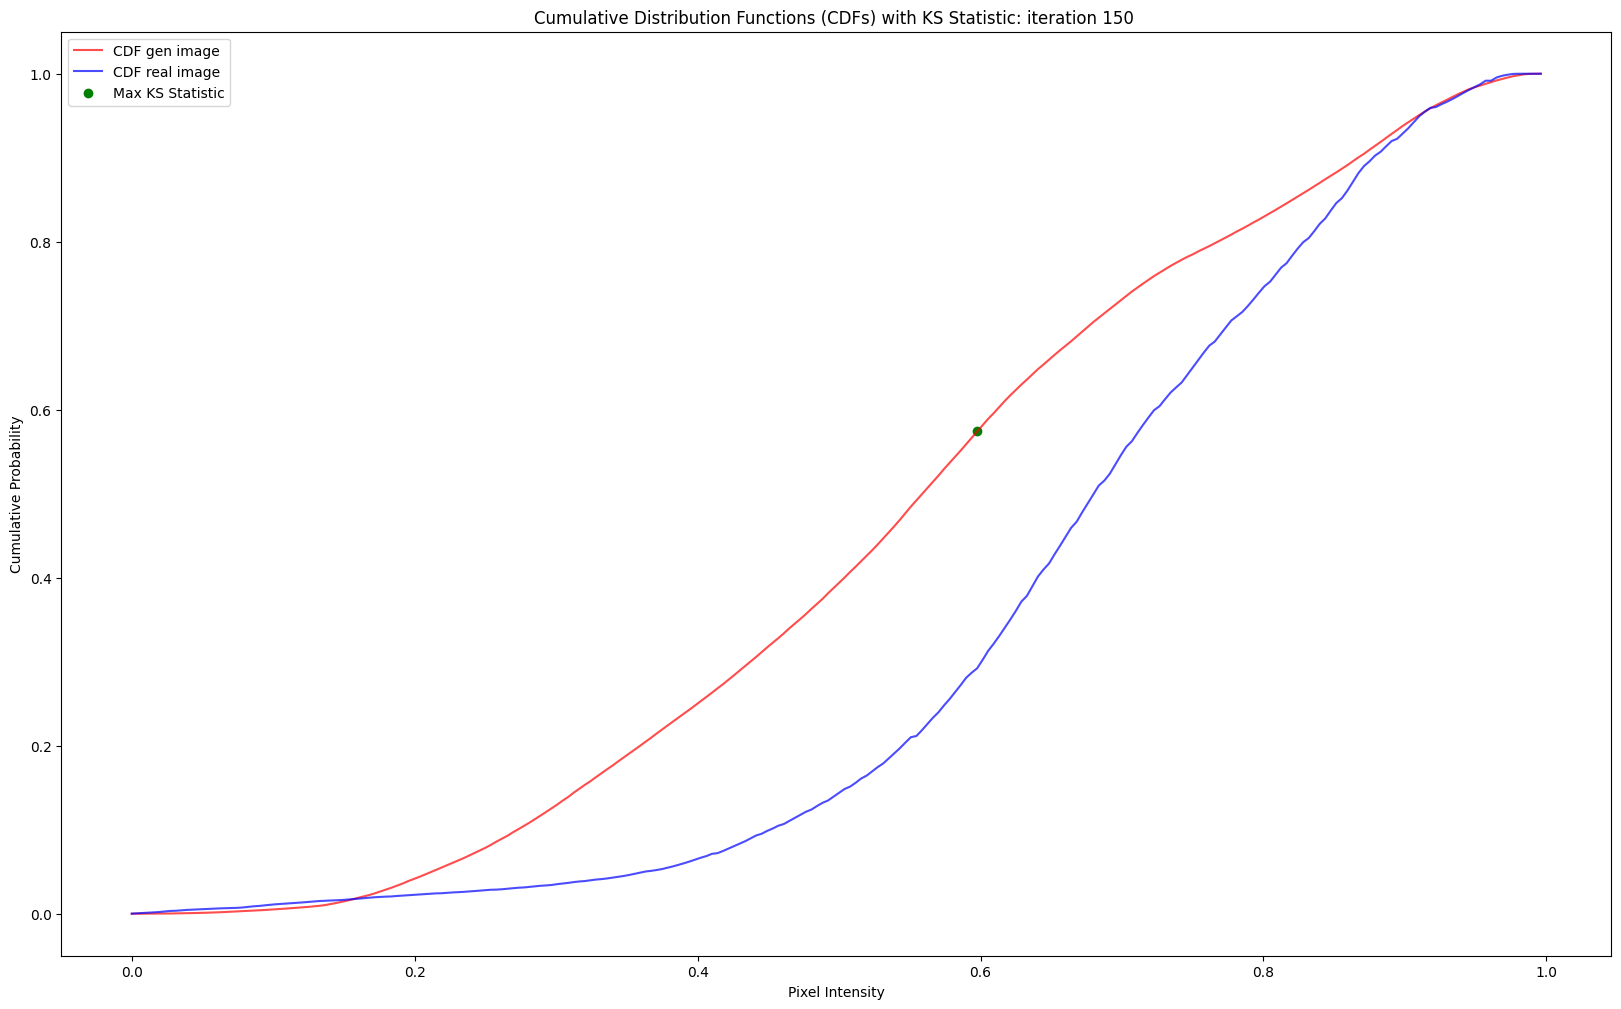

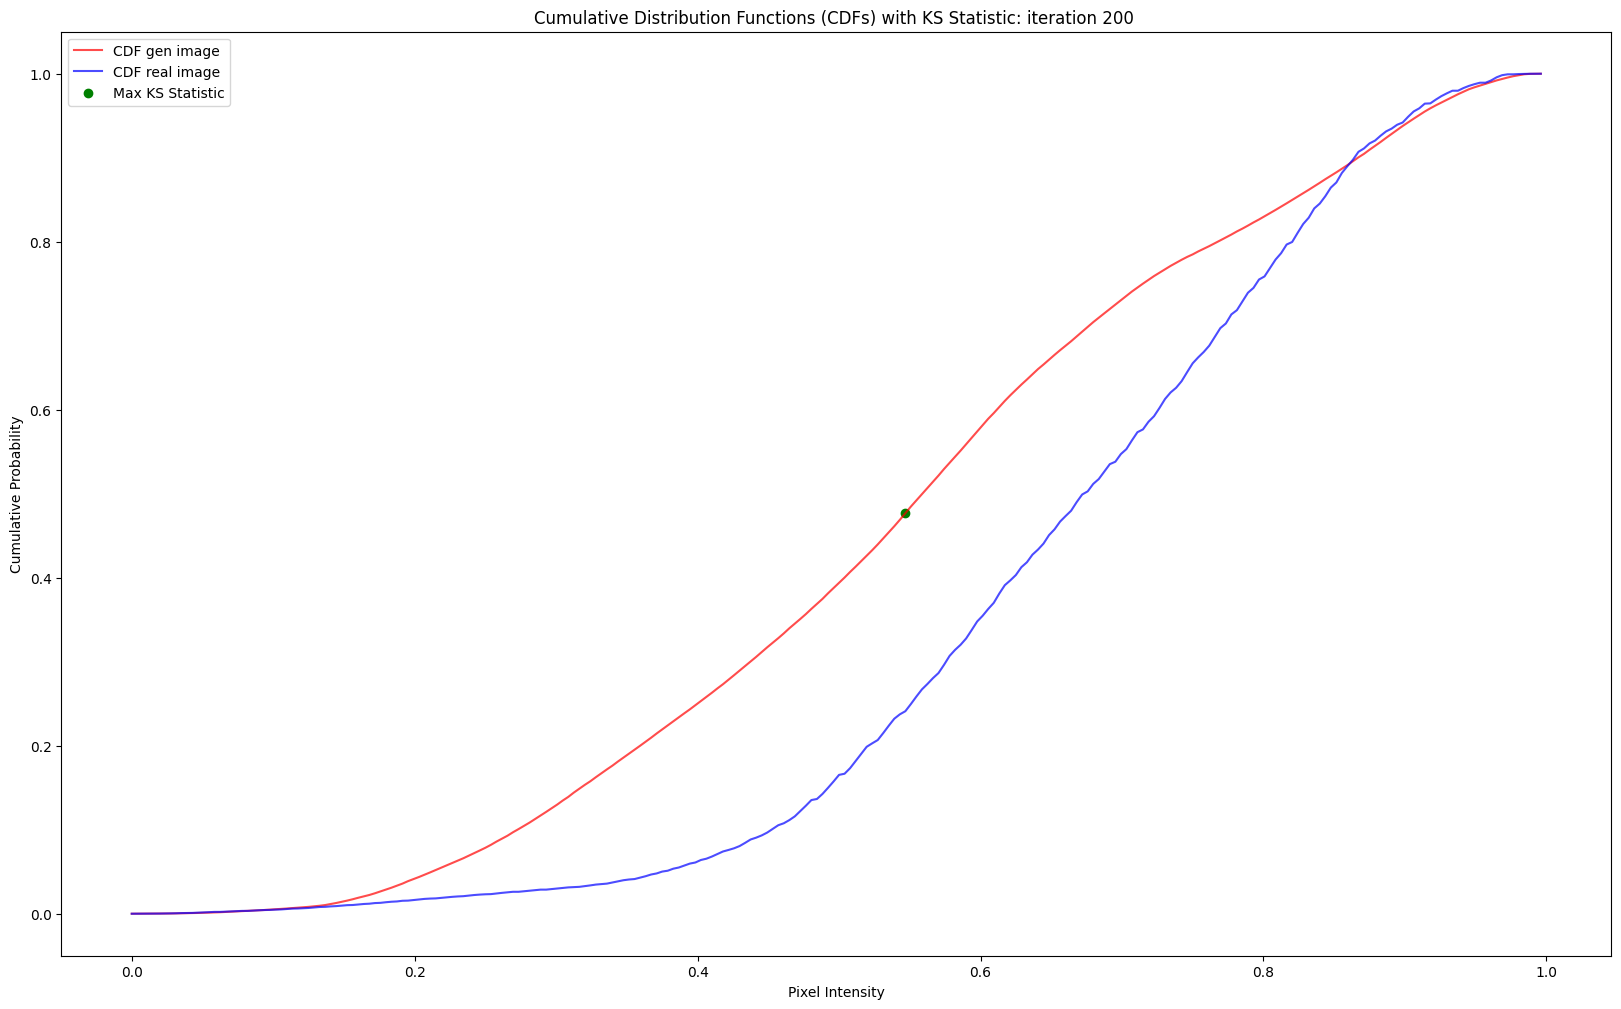

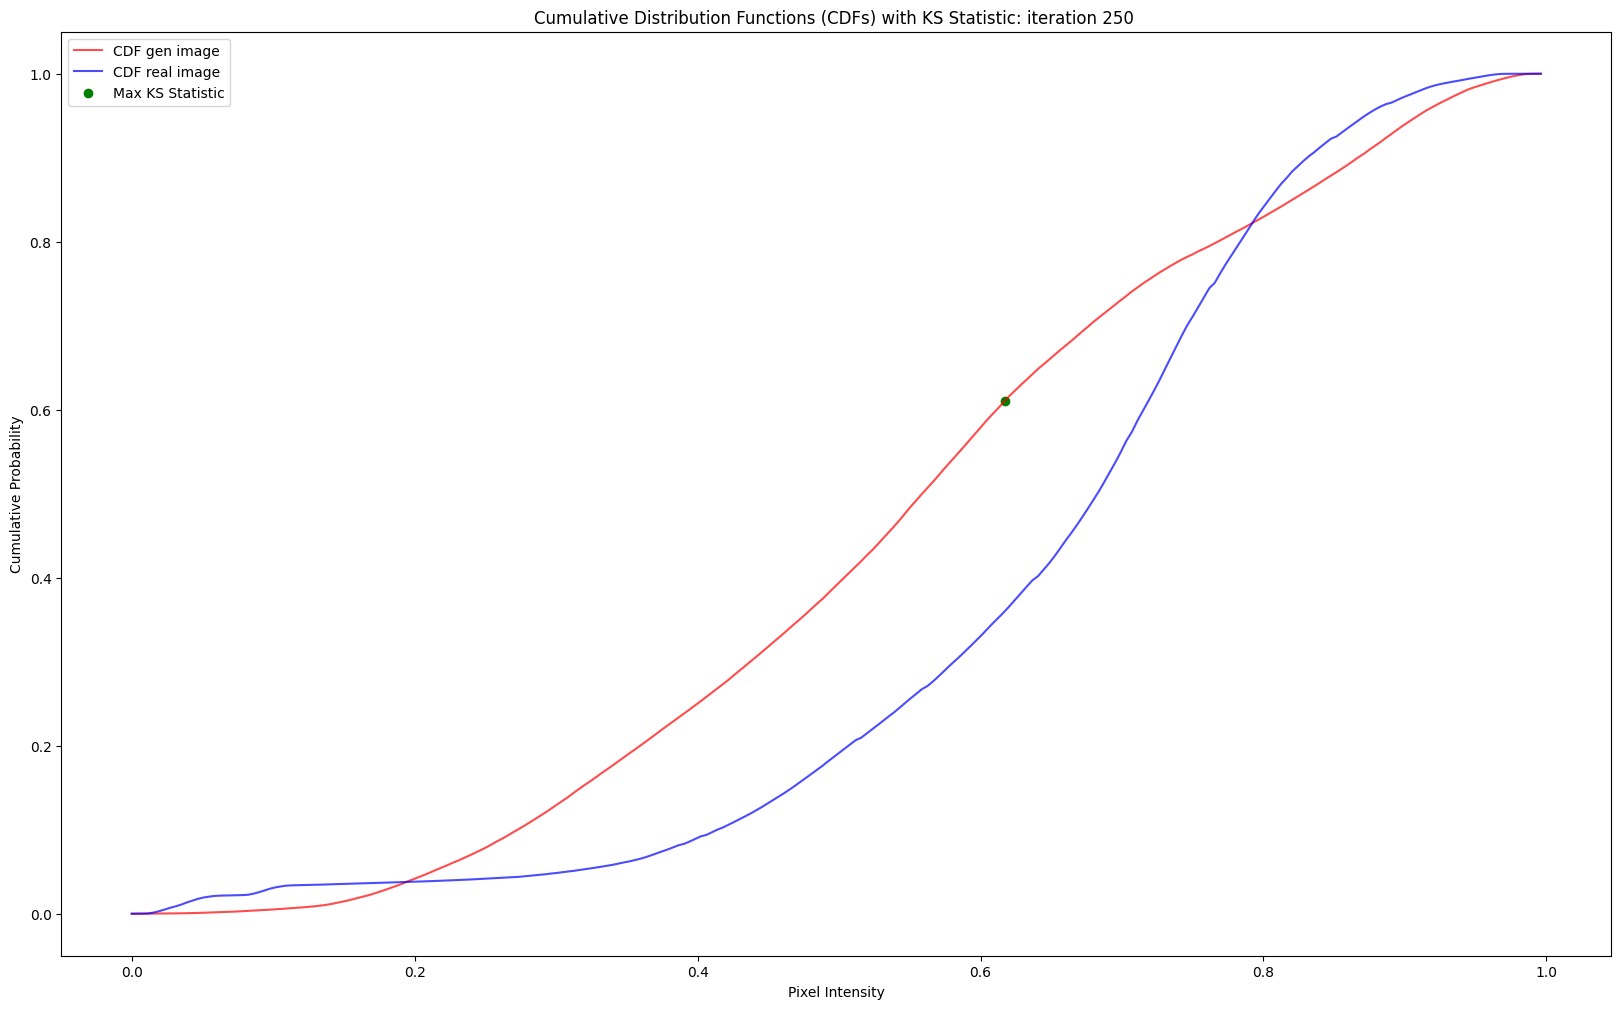

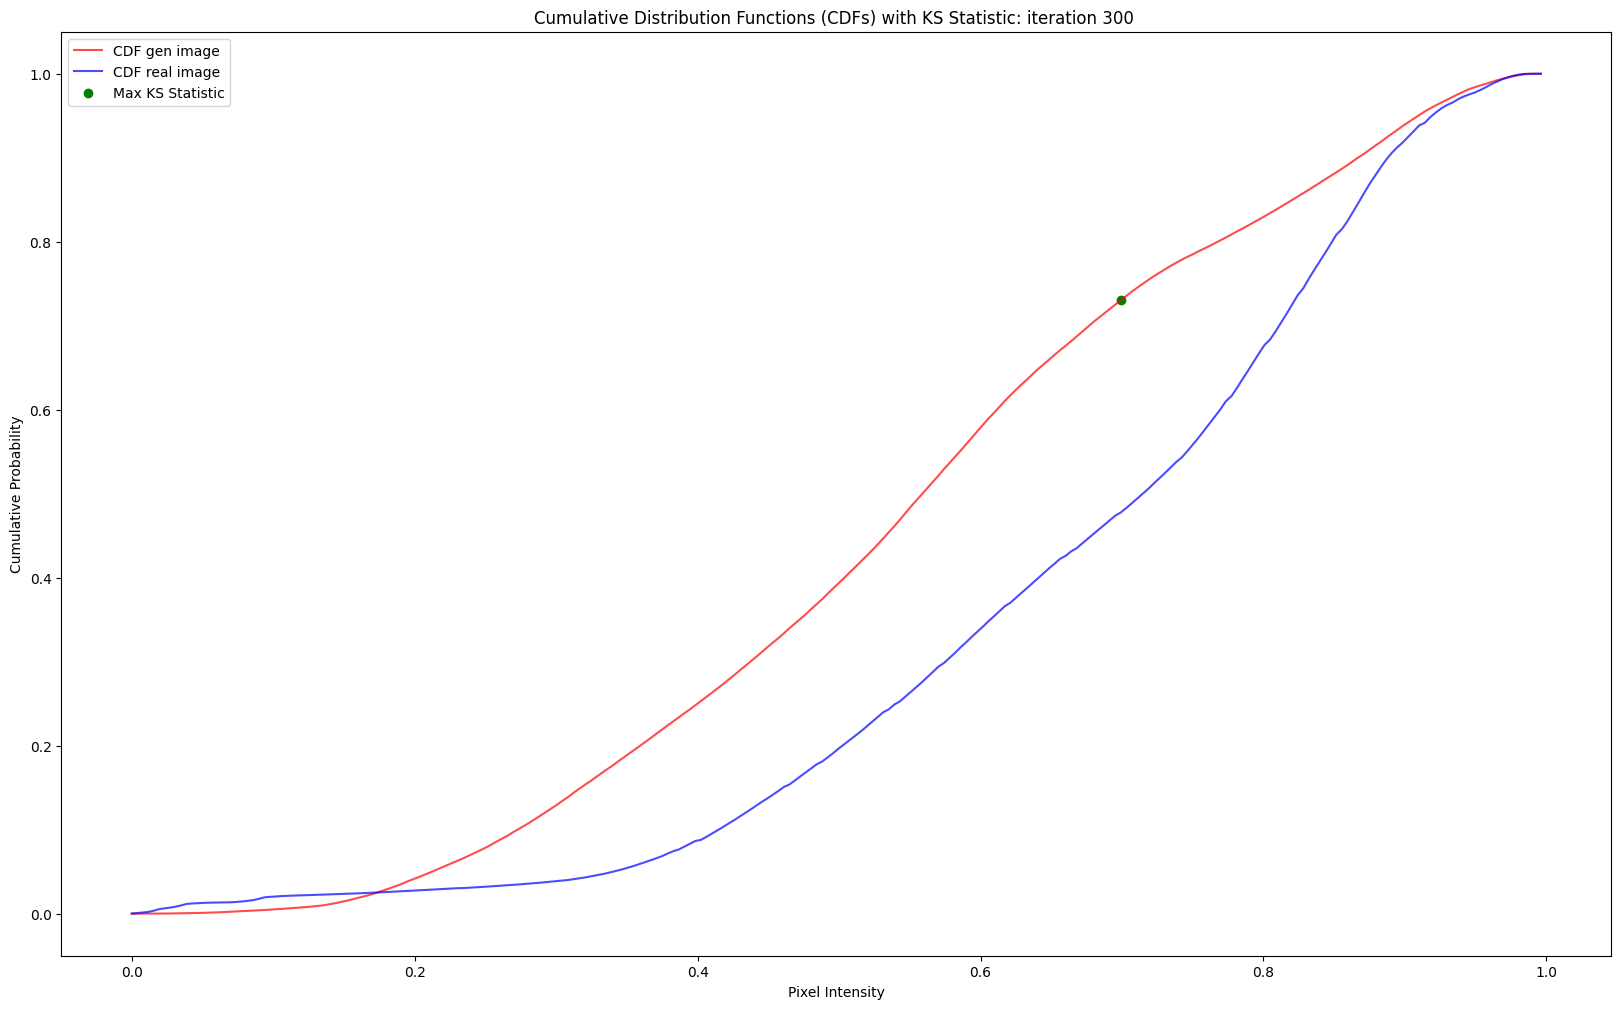

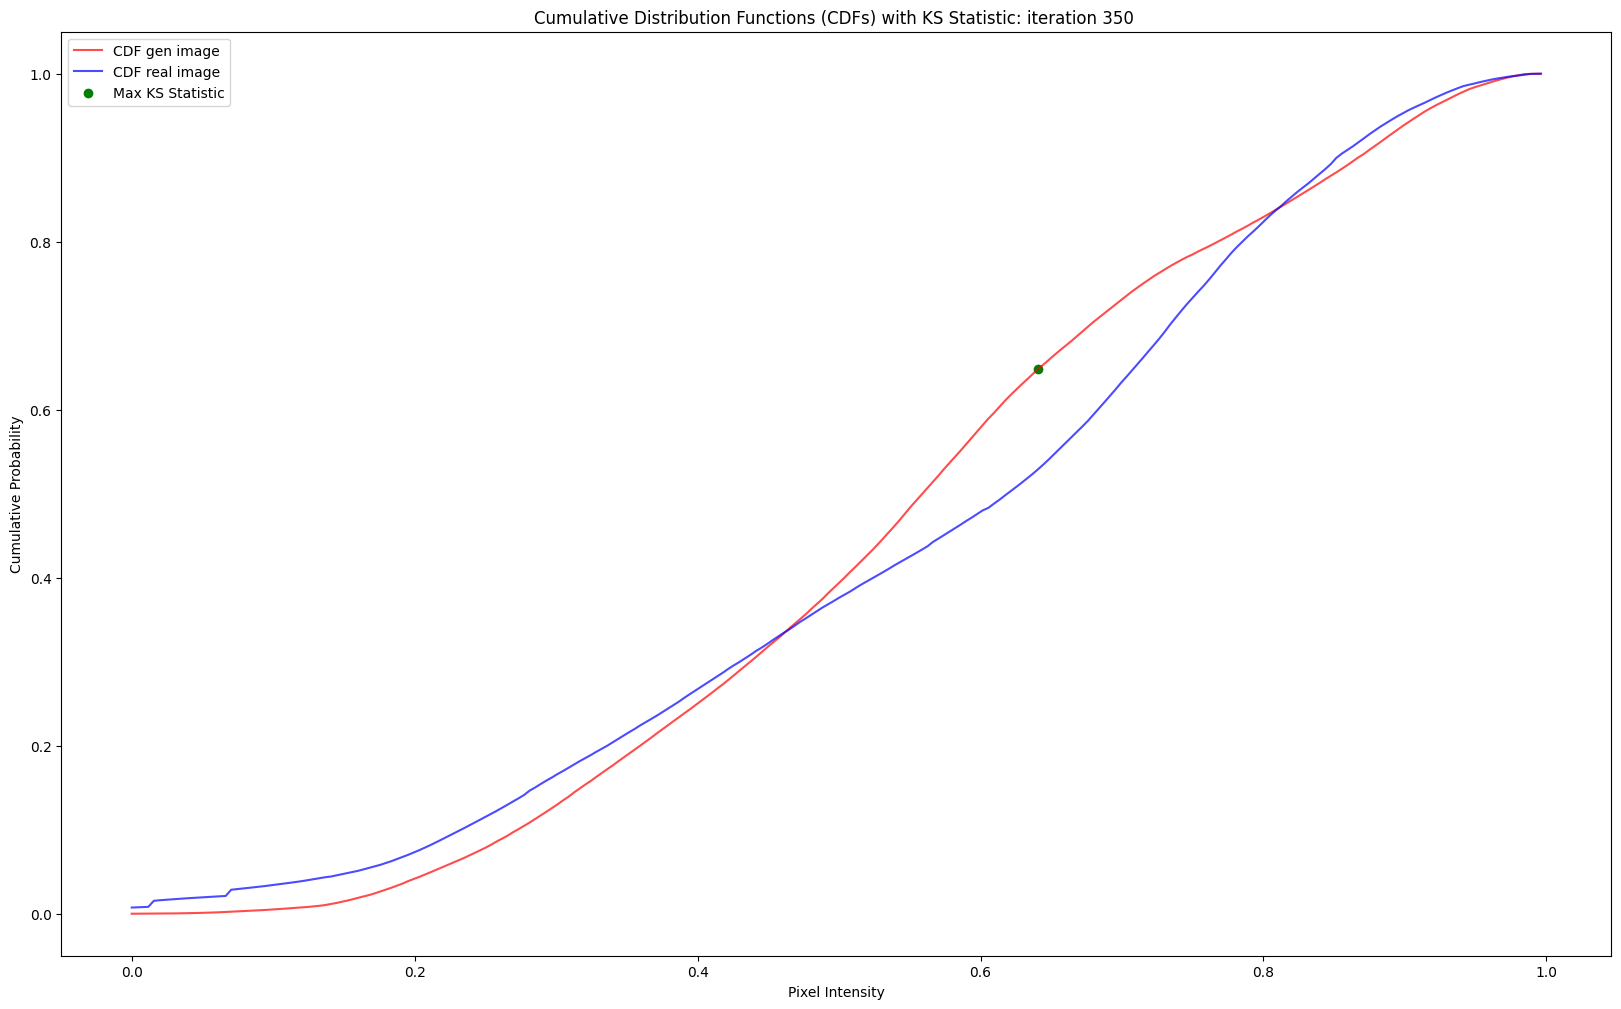

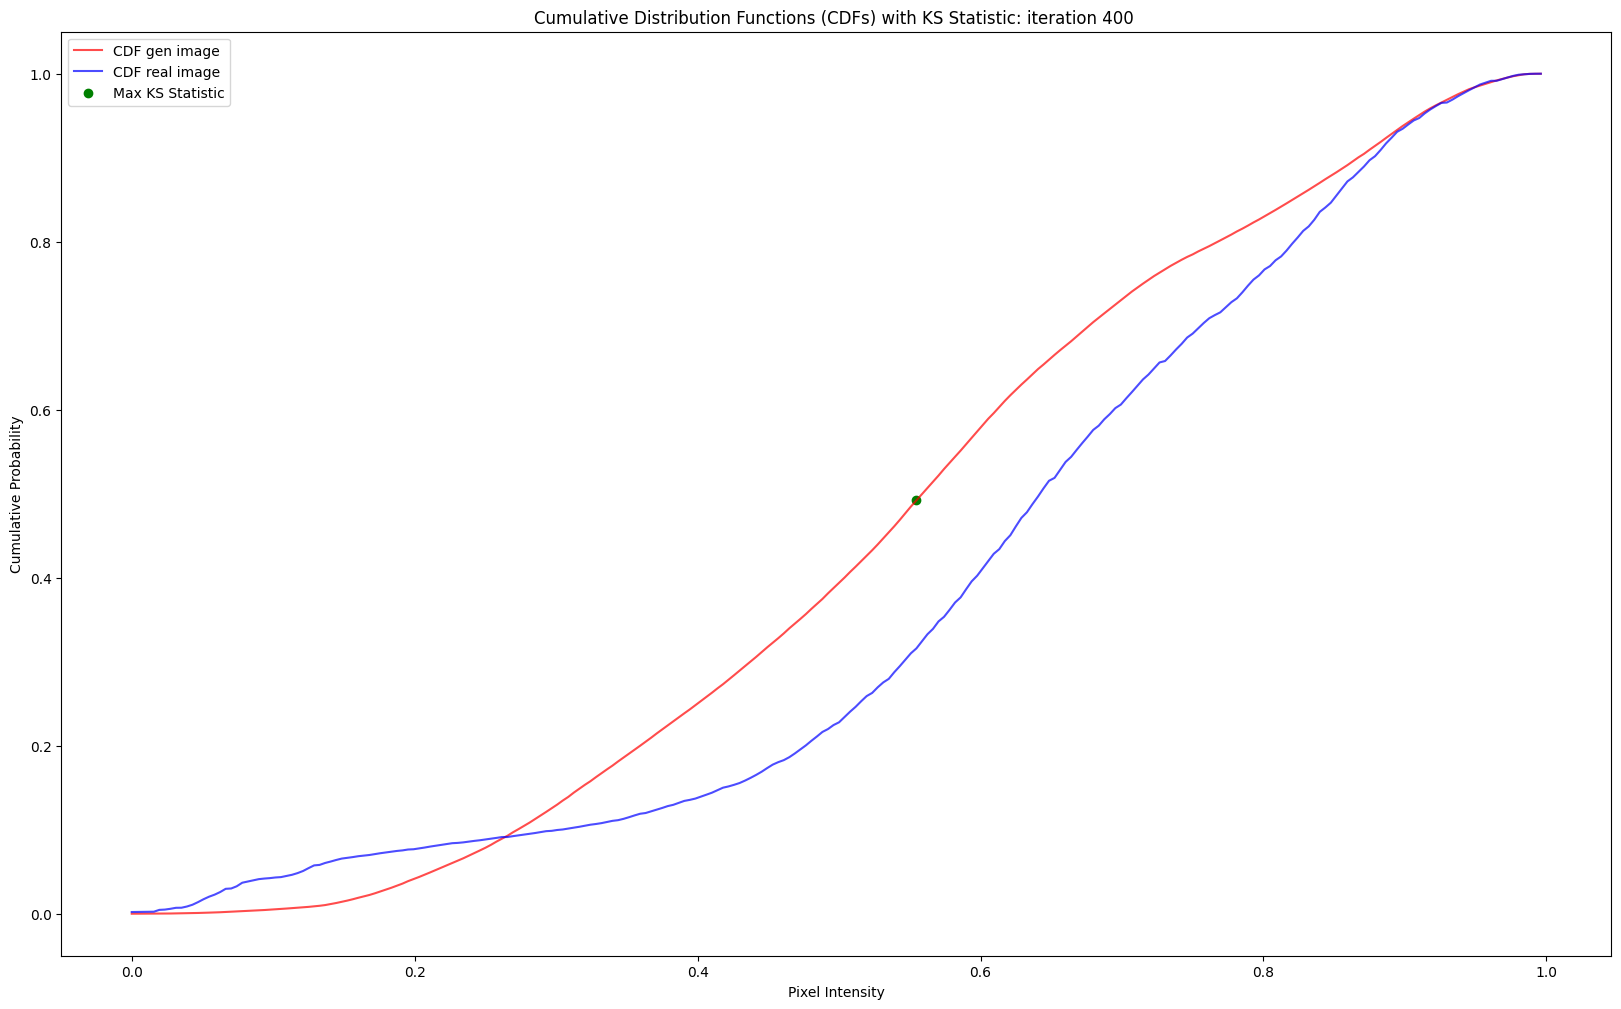

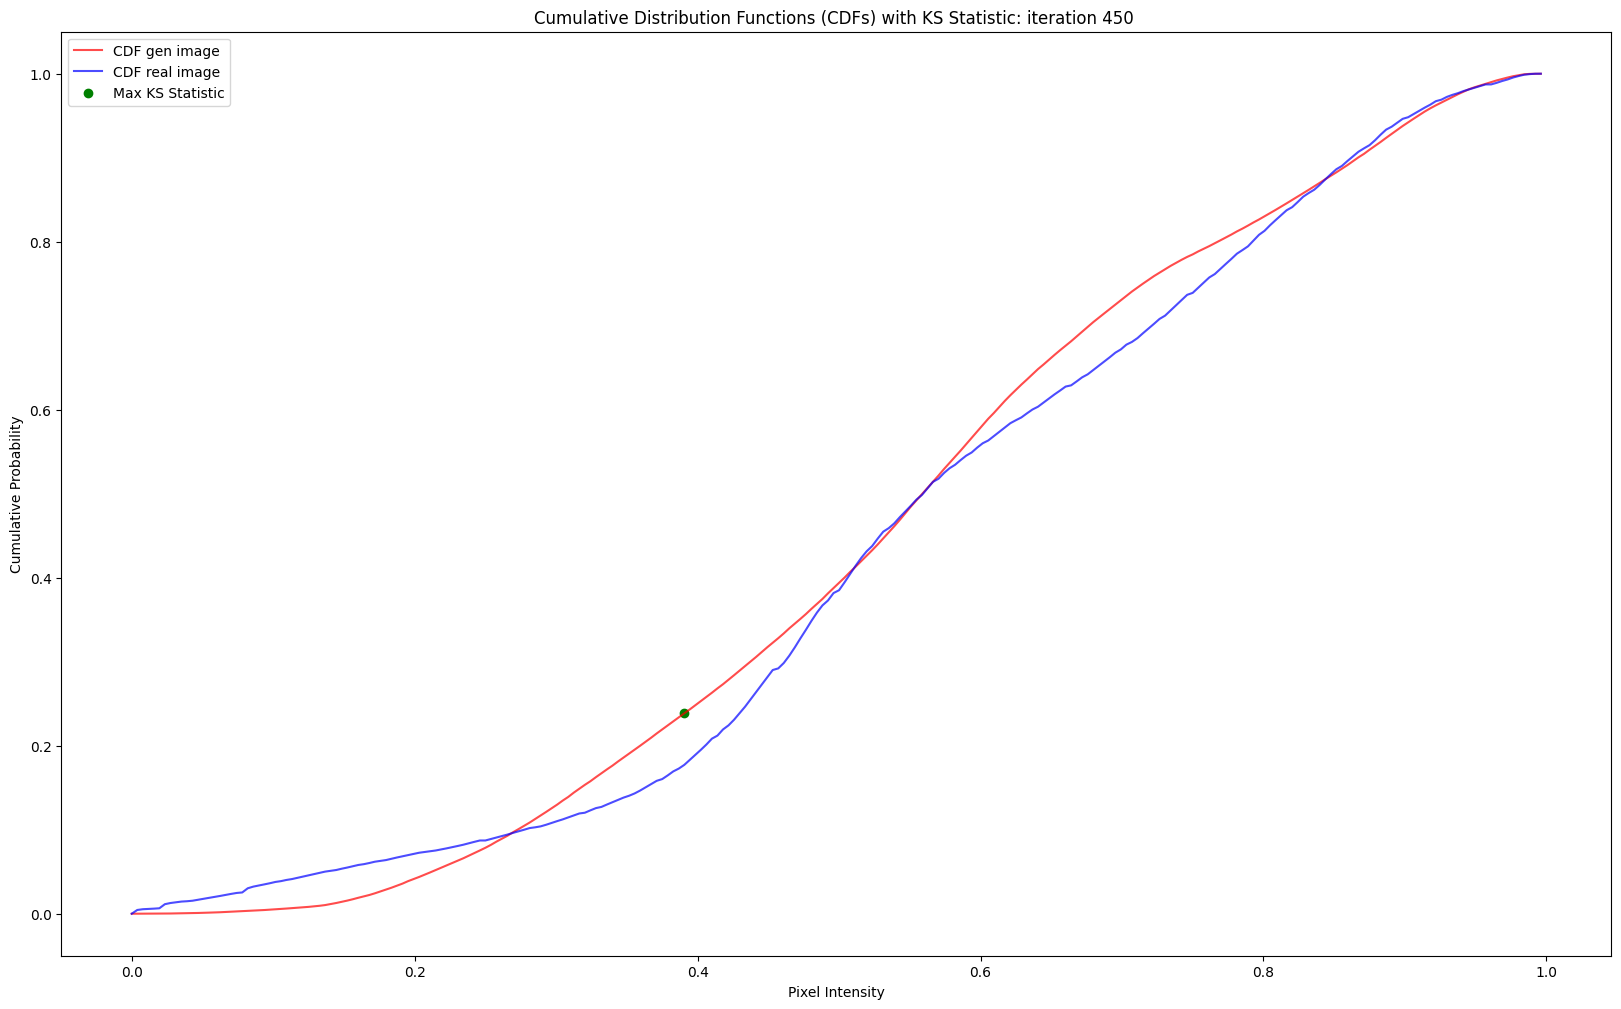

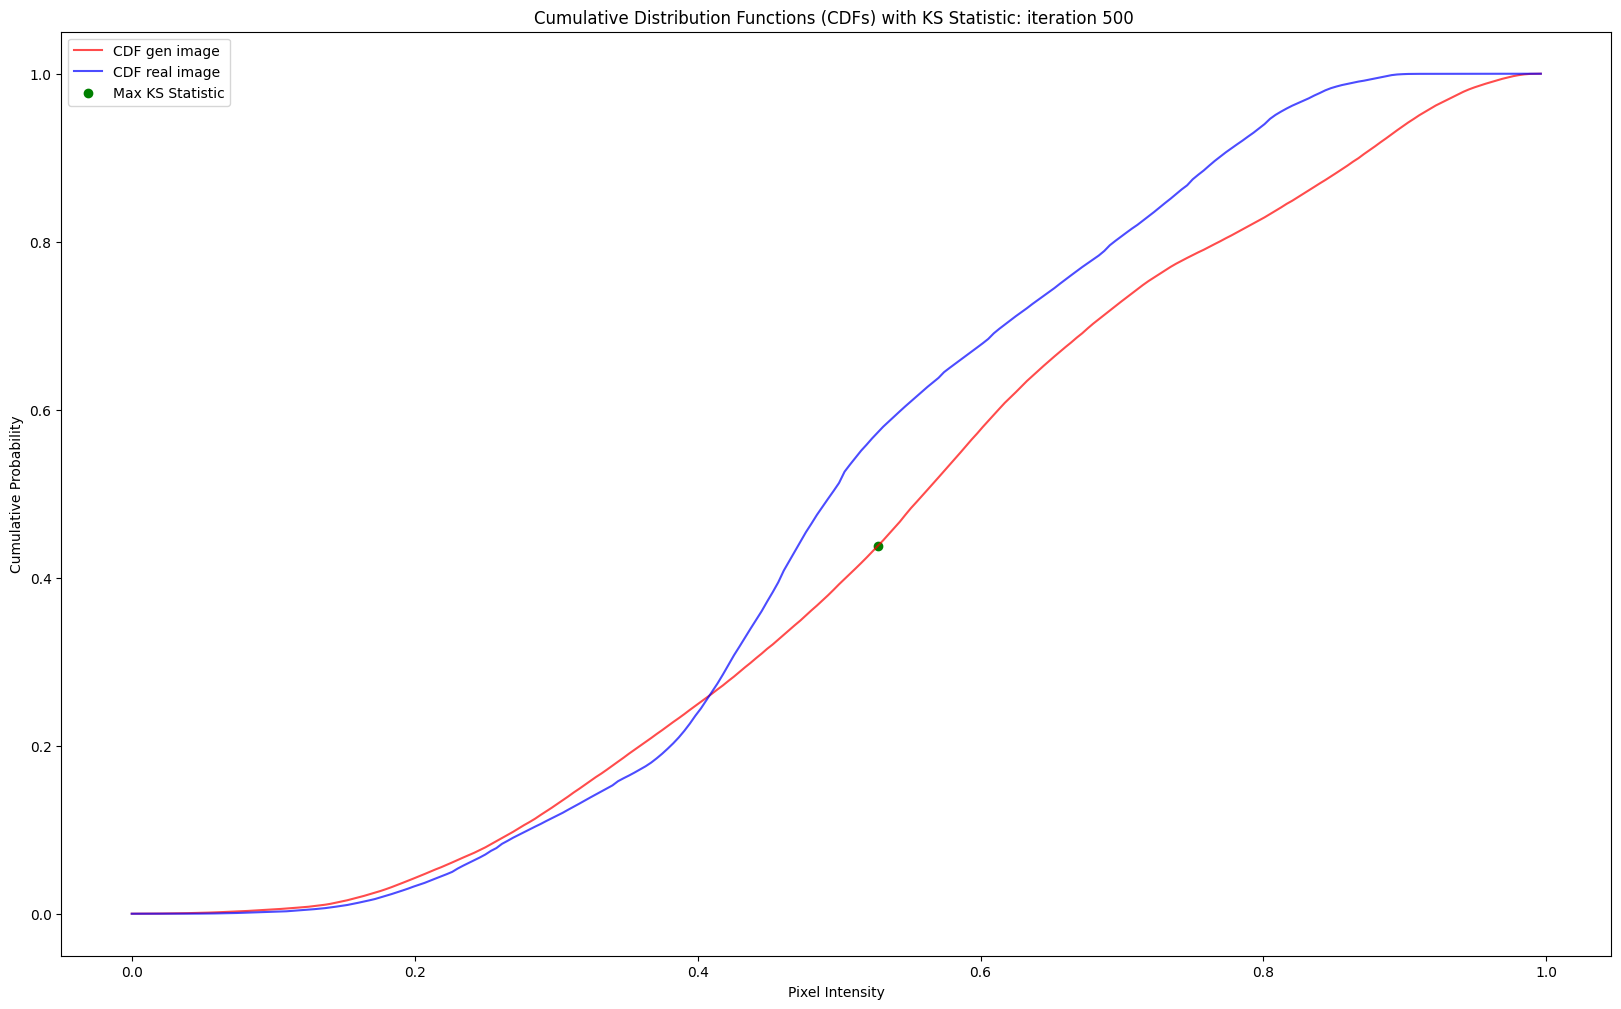

In [40]:
#Create holders for counts of hypothesis and null hypothesis
hypothesis_counts = 0
null_hypothesis_counts = 0

#Plot number! This controls the plot of the cdfs and ks statistic certain period of time
plot_num = 50
plot_val = 0

#Assign alpha to obtain crit value
alpha_val = 0.05

# Lets do this! Iterate through each of the images
for i, real_image in enumerate(real_images):
    #Add 1 to plot_val
    #plot_val += 1
    gen_image = gen_images[i]

    ### Calculate the pdf and cdf for gen image.
    pdf_gen_image, bins = calculate_pdf(gen_image)
    cdf_gen_image = calculate_cdf(pdf_gen_image)

    ### Calculate the pdf and gen for real image.
    pdf_real_image, bins= calculate_pdf(real_image)
    cdf_real_image = calculate_cdf(pdf_real_image)

    #Determine the critical value
    crit_val = crit_value(cdf_gen_image.shape[0], cdf_real_image.shape[0], alpha=alpha_val)

    #Determine the ks stat
    ks_dist = ks_statistics(cdf_gen_image, cdf_real_image)

    #If condition if we need to plot
    if plot_val % plot_num == 0:
        ##Plot the cdfs
        plot_cdfs_and_ks_statistic(cdf_gen_image, cdf_real_image, bins, plot_val)
        plt.show()

    #Add 1 to plot_val
    plot_val += 1

    #If conditions to assign counts
    if ks_dist.item() < crit_val:
        hypothesis_counts += 1
    else:
        null_hypothesis_counts += 1

##Plot the last cdf distribution
plot_cdfs_and_ks_statistic(cdf_gen_image, cdf_real_image, bins, plot_val)
plt.show()

### Plot the bar graph of hypothesis and null counts

Finally, plot the counts where the hypothesis and null hypothesis were rejected.

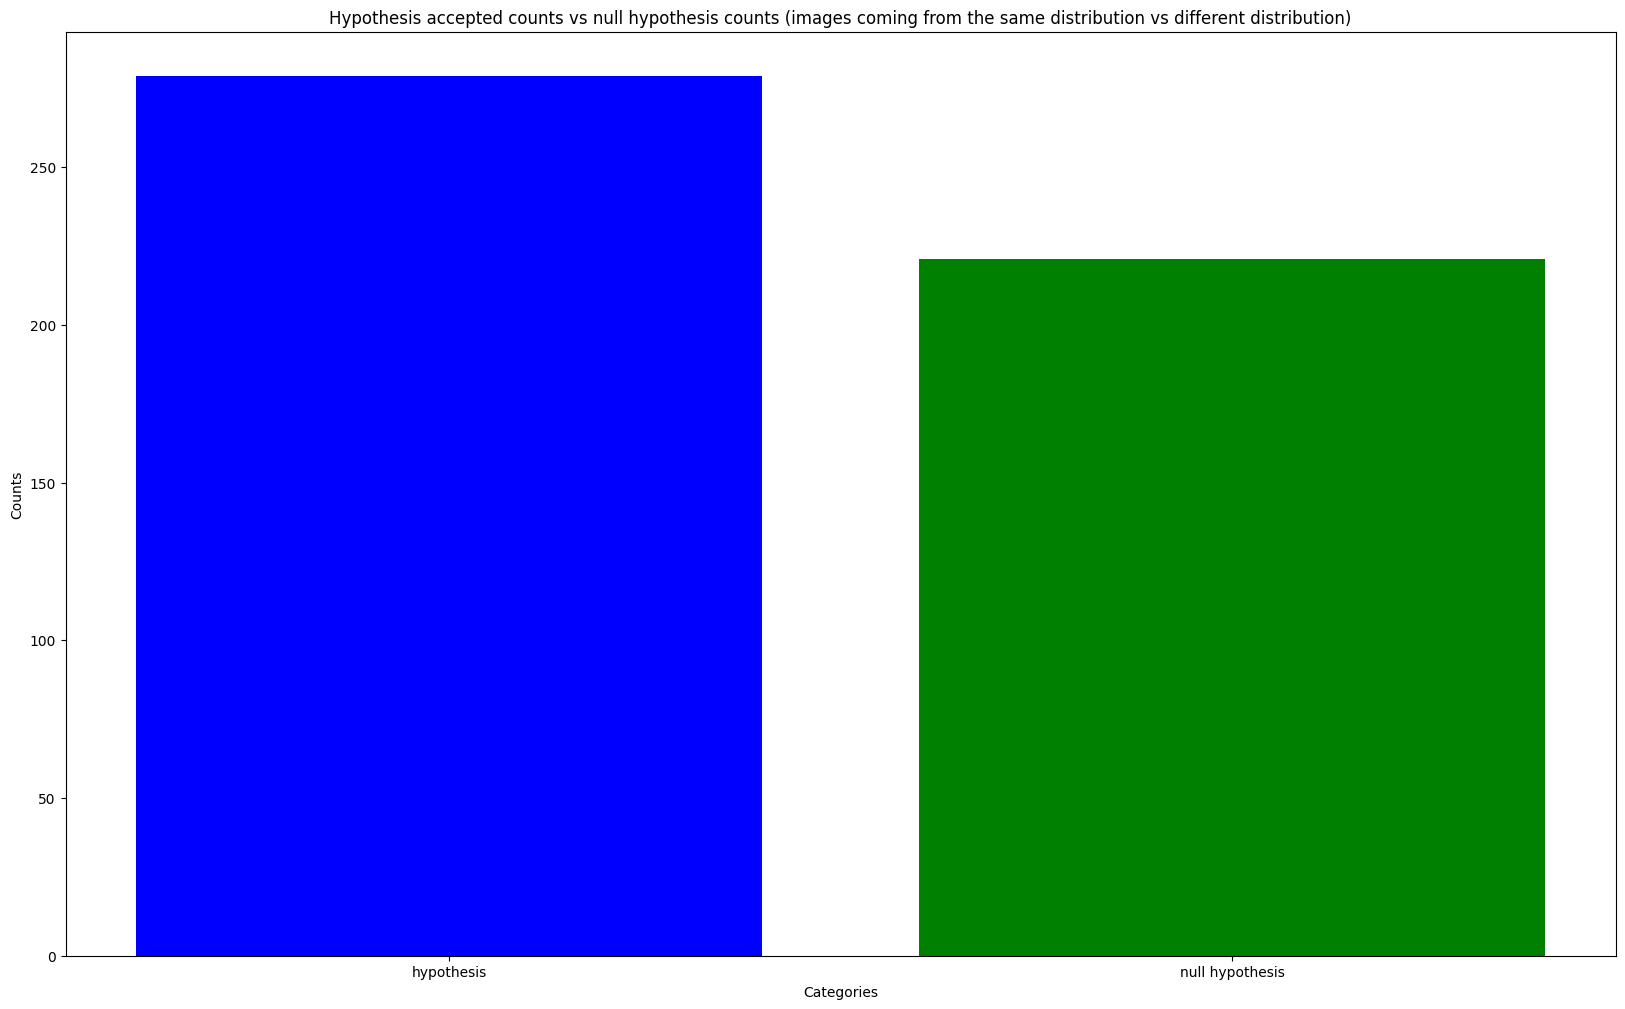

In [41]:
def plot_counts(counts1, counts2):
    labels = ['hypothesis', 'null hypothesis']
    plt.bar(labels, [counts1, counts2], color=['blue', 'green'])
    plt.title('Hypothesis accepted counts vs null hypothesis counts (images coming from the same distribution vs different distribution)')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.show()

plot_counts(hypothesis_counts, null_hypothesis_counts)